# #1. 분석 순서

1. 데이터 자료 수집 : 데이터 분석의 첫 단계로, 분석할 데이터를 수집. 이 단계에서 데이터의 출처와 형식을 정확히 확인

2. 수집자료 불러오기 : 수집한 데이터를 적절한 형식으로 불러와서 사용 가능한 형태로 가공

3. 데이터프레임 타입 확인 : 데이터프레임을 불러온 후, 데이터의 구조와 타입을 확인

4. 결측치 확인 : 데이터프레임에서 결측치(missing values)가 있는지 확인

5. 결측치 있으면 처리 : 결측치가 있을 경우, 적절한 방법으로 대체하거나 제거

6. 기초통계량 확인 : 데이터의 대략적인 분포와 통계적 특성을 파악하기 위해 기초통계량을 확인. 평균, 중앙값, 표준편차 등을 확인

7. 레그플롯, 박스플롯, 히스토그램 : 해당 그래프들을 이용하여 이상치 있는지 확인 및 도수분포 확인

8. 이상치 제거 : 이상치가 발견되면 query함수를 이용하여 제외시킴

9. 레그플롯, 히스토그램(도수 분포 제대로 됬는지 확인) 재확인 : 이상치 제거 후 분석 진행 전 더블 체크하기

10. 신뢰구간 확인 : 데이터의 통계적 신뢰도를 파악하기 위해 신뢰구간을 확인. 이는 결과의 신뢰성을 판단하는데 도움을 줌

11. 각 요인별 상관관계 확인 : 산점도 행렬 및 히트맵 그래프를 이용하여 각 요인들간에 상관관계 있는 지 파악

12. 표준화 : 분석에 사용할 변수를 표준화하여 변수 간 스케일 차이를 해소하고 분석 결과를 더욱 해석하기 쉽게 만듦

13. PCA 주성분분석 : PCA(주성분분석)를 사용하여 변수 간 상관관계를 파악하고 차원 축소를 통해 데이터의 변수 수를 줄임

14. 데이터 분석: 회귀분석을 사용하여 데이터 간 관계를 파악하고 해석

15. 정규분포가정(정규성 검정 대체) : 정규성 가정을 확인하거나 대체 방법을 사용하여 정규성을 검토

16. 그래프,차트 제시 : 분석 결과를 시각화하여 보다 명확하게 전달하고, 그래프와 차트를 통해 패턴과 관계를 시각적으로 확인

17. 결론 제시 및 ppt제작 : 분석 결과를 바탕으로 결론을 도출하고, PPT나 보고서 형식으로 결과를 제시

In [1]:
# 패키지 참조

import pandas as pd
from pandas import read_excel, DataFrame, merge, get_dummies
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sb
import numpy as np
import sys
from scipy.stats import t
from scipy.stats import skew, kurtosis
from math import sqrt

from sklearn.decomposition import PCA #주성분 분석용 패키지
from pca import pca # 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지

import helper

In [2]:
# 그래프 설정
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

# #2. 프로젝트 목표 : 총생활비에 영향을 미치는 요소 파악하기

한국복지패널에서 매년 실시하는 계층의 규모 및 생활실태 조사 데이터를 기반으로 그 중에서 몇가지 요인들을 선정

총 7865 가구의 관측치가 존재.

| 변수 | 의미 | 기타 | 비고 |
| --- | --- | ---| --- |
| 총생활비 | 한달에 지출되는 총 생활비 | 월 / 단위:만원 | 종속변수 |
| 이자_배당금_연간소득 | 은행이자나 주식 배당금으로 얻는 연간 수입|년간 / 단위:만원 | 불로소득 |
| 임대료_연간소득 | 전세보증금,월세등 | 년간 / 단위:만원 | 불로소 득|
| 기타_소득 | 상여금, 장려금, 보상금 등 | 년간 / 단위:만원 | 불로소득 |
| 부모가보낸생활비 | 부모로부터 받은 보조금(생활비개념) | 년간 / 단위:만원 | 불로소득 |
| 자녀가보낸생활비 | 자녀로부터 받은 보조금(생활비개념) | 년간 / 단위:만원 | 불로소득 |
| 민간보조금 | 민간 개인 또는 단체로부터 받은 보조금(생활비개념) | 년간/ 단위:만원 | 불로소득 |
| 세금환급금 | 납세자가 내야할 세액보다 더 많이 내서 나오는 환급금 | 년간 / 단위:만원|불로소득 |
| 기초연금 | 저소득층 노인에게 지급하는 연금|년간 / 단위:만원 | 불로소득 |
| 공적연금 | 국민연금, 공무원연금, 군인연금, 사립학교교직원연금을 의미 | 년간 / 단위:만원 | 불로소득 |
| 재난지원금 | 코로나19에 따른 국민생계 안정을 위해 지원하는 금액 | 년간 / 단위:만원|불로소득 |
| 금융기관대출 |금융권에서 받은 대출액 | 단위:만원 | 부채 |
| 주택관련_부채액 | 주택 구매,임대 관련하여 발생한 부채액(대출액) | 단위:만원|부채 |
| 주거관련_부채의_이자 | 주택관련 부채액의 이자 | 년간 / 단위:만원 | 부채 |
| 기타_이자|일반 대출이나 기타 사항에 의해 발생한 이자 | 년간 / 단위:만원 | 부채 |


해당 변수는 전부 수치형 데이터로 이루어져있다(category 형식이 없음을 확인).


### #2-1 재난지원금이나 공적연금도 불로소득에 포함되는가?

불로소득

말 그대로 일(노동)을 하지 않고 얻는 소득을 의미.

불로소득에 범주로는 은행예금,채권이자,주식배당,용돈,부동산 임대수익,골동품과 미술품같은 공급이 제한된 재화에서 판매하여 나오는 차익,상속/증여세,복지제도 혜택,연금등이 포함.

여기서 공적연금과 기초연금은 연금속성으로 간주하고 재난지원금은 복지제도의 혜택으로 간주하여 이번 조사 대상에 같이 포함

>출처 : 네이버 지식백과

## #2-2 가설 설정

가설1: 금융기관 대출 부채가 증가할수록 총 생활비는 감소할 것이다. (부채 관련)

가설2: 재난 지원금을 받는 사람들의 경우, 이것으로 인한 효과로 인해 그들의 전체적인 생활 비용에 변화(증가)가 있을 것이다. (불로소득 관련)

# #3.데이터 준비

In [3]:
#데이터 불러오기
df=read_excel("세미프로젝트3.xlsx")
df

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,0,25,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,20,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,540,20,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,125,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,35,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,384,0.0,0,1.0,50.0,0,0.0,70.0,0,0,100,3000,3000.0,96,0.0
7861,715,0.0,660,1.0,40.0,0,0.0,90.0,0,0,100,40000,0.0,0,1560.0
7862,595,0.0,4000,1.0,40.0,0,0.0,0.0,0,0,120,25947,25947.0,67,0.0
7863,562,40.0,0,0.0,0.0,0,0.0,0.0,0,0,30,12000,12000.0,360,0.0


In [4]:
#원본 데이터 유지하기 위해 카피본 생성
df1=df.copy()

# #4.데이터형식 확인

In [5]:
# 각 변수 데이터타입 확인하기
# df1.dtypes

In [6]:
#각 변수 데이터타입 확인하기 ver2
helper.prettyPrint(df1.dtypes, title='데이터 타입')

+----------------------+---------------+
|                      | 데이터 타입   |
|----------------------+---------------|
| 총생활비             | int64         |
| 이자_배당금_연간소득 | float64       |
| 임대료_연간소득      | int64         |
| 기타_소득            | float64       |
| 부모가보낸생활비     | float64       |
| 자녀가보낸생활비     | int64         |
| 민간보조금           | float64       |
| 세금환급금           | float64       |
| 기초연금             | int64         |
| 공적연금             | int64         |
| 재난지원금           | int64         |
| 금융기관대출         | int64         |
| 주택관련_부채액      | float64       |
| 주거관련_부채의_이자 | int64         |
| 기타이자             | float64       |
+----------------------+---------------+


> 데이터 타입 확인 결과 준비한 데이터는 전부 수치형 데이터 타입임을 확인, 범주형 변수는 없음

> 따라서 선정한 변수들은 모두 `연속형 데이터`이고 `비율척도`로 확인됨

# #5.결측치 확인

In [7]:
#결측치 확인하기.

#해당 데이터에서 한번에 결측치 조회하는 방법
helper.prettyPrint(df1.isna().sum(), title='결측치 건수') #isna() -> 결측치값 조회, #sum->합계조회

+----------------------+---------------+
|                      |   결측치 건수 |
|----------------------+---------------|
| 총생활비             |             0 |
| 이자_배당금_연간소득 |             0 |
| 임대료_연간소득      |             0 |
| 기타_소득            |             0 |
| 부모가보낸생활비     |             0 |
| 자녀가보낸생활비     |             0 |
| 민간보조금           |             0 |
| 세금환급금           |             0 |
| 기초연금             |             0 |
| 공적연금             |             0 |
| 재난지원금           |             0 |
| 금융기관대출         |             0 |
| 주택관련_부채액      |          1079 |
| 주거관련_부채의_이자 |             0 |
| 기타이자             |             0 |
+----------------------+---------------+


## #5-1.결측치 처리 - 0값으로 대체

In [8]:
# 주택관련_부채액에서 결측치 1079건이 확인되었고 부채액이 없는것으로 간주하고 수치값'0'으로 대체
re_df1=df1.fillna(0) #fillna() 결측치 값을 수정, ()안에 수치값을 넣으면 결측치는 해당 수치값으로 일괄변경
re_df1.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,0,25,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,20,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,540,20,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,125,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,35,0,0.0,0,0.0


In [9]:
helper.prettyPrint(re_df1.isna().sum(), title='결측치 확인')

+----------------------+---------------+
|                      |   결측치 확인 |
|----------------------+---------------|
| 총생활비             |             0 |
| 이자_배당금_연간소득 |             0 |
| 임대료_연간소득      |             0 |
| 기타_소득            |             0 |
| 부모가보낸생활비     |             0 |
| 자녀가보낸생활비     |             0 |
| 민간보조금           |             0 |
| 세금환급금           |             0 |
| 기초연금             |             0 |
| 공적연금             |             0 |
| 재난지원금           |             0 |
| 금융기관대출         |             0 |
| 주택관련_부채액      |             0 |
| 주거관련_부채의_이자 |             0 |
| 기타이자             |             0 |
+----------------------+---------------+


> 결측치가 없는 데이터로 수정되었음

# #6. 데이터셋 확인

for문으로 컬럼 돌려서 수치가 0인값, 0이 아닌값 찾아보기<br>
0이 아닌 수가 너무 적으면 데이터를 선정한 의미가 없기 때문(정상적인 분석이 어렵다는 뜻)

In [10]:
# ver1
# re_df1의 컬럼을 for문으로 돌림
# 각 컬럼별로 데이터셋 7865개를 확인해서 수치가 0인것과 0이 아닌것으로 나눔
# 수치가 0 -> zero count / 수치가 1 이상 -> number count
for column in re_df1.columns:
    zero_count = re_df1.loc[re_df1[column] == 0].shape[0]
    number_count = re_df1.loc[re_df1[column] != 0].shape[0]
    # print('0 개수 :',{column : zero_count})
    # print('0 아닌 수 :',{column : number_count})
    # print('-'*40)

In [11]:
# ver2
# re_df1의 컬럼을 for문으로 돌림
# 각 컬럼별로 데이터셋 7865개를 확인해서 수치가 0인것과 0이 아닌것으로 나눔
# 수치가 0 -> zero count / 수치가 1 이상 -> number count
results = [] # 빈 리스트 생성
for column in re_df1.columns:
    zero_count = re_df1.loc[re_df1[column] == 0].shape[0]
    number_count = re_df1.loc[re_df1[column] != 0].shape[0]
    results.append({
        '변수명': column,
        '데이터 수치: 0': zero_count,
        '데이터 수치: 1이상': number_count  # 빈 리스트에 append 함수 이용하여 나온 결과를 집어넣음
    })
result_df = pd.DataFrame(results) # results 리스트를 데이터프레임화
result_df

,변수명,데이터 수치: 0,데이터 수치: 1이상
0,총생활비,0,7865
1,이자_배당금_연간소득,5489,2376
2,임대료_연간소득,6707,1158
3,기타_소득,1439,6426
4,부모가보낸생활비,6366,1499
5,자녀가보낸생활비,3296,4569
6,민간보조금,4019,3846
7,세금환급금,6275,1590
8,기초연금,4155,3710
9,공적연금,4777,3088


> 컬럼 별로 0값이 아닌 수 가 전부 1000건 이상이라 따로 제외하는 변수 없이 진행하기로 결정.

>최소 1000개 이상의 유효한 데이터를 얻을 수 있다는 의미

# #7.데이터의 기초통계량 확인

전체적인 데이터의 특징을 알아보기 위해 기초통계량 표로 확인

In [12]:
# 해당 데이터 기초통계량 확인
# 데이터 분석에 앞서 전체적인 데이터의 특징을 알아보기 위해 기초통계량 표로 확인하고자 한다.
re_df1.describe()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
count,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000
mean,329.821615,55.537889,129.335537,8.455906,45.949345,230.697394,58.165938,14.505976,193.395804,288.638525,94.907692,2958.797203,1773.447552,53.391736,47.884819
std,1314.994181,347.927318,644.462635,87.829841,218.871812,411.961750,202.688990,59.830654,219.694787,675.030701,143.003077,8277.347380,5527.462362,195.465924,358.612080
min,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000
50%,228.000000,0.000000,0.000000,7.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000
75%,435.000000,20.000000,0.000000,8.000000,0.000000,300.000000,30.000000,0.000000,360.000000,288.000000,105.000000,1700.000000,0.000000,0.000000,0.000000
max,114446.000000,22025.000000,17640.000000,5506.000000,5500.000000,6537.000000,4555.000000,1000.000000,936.000000,8796.000000,7140.000000,200000.000000,120000.000000,7200.000000,22616.000000


> 기초통계량 확인 결과

> 1) 조사 가구 수는 총 7865가구이다.
> 2) 총생활비의 평균값은 329.8만원이고 중앙값은 228만원, 최대값은 114446만원이다.
> 3) 이자_배당금_연간소득의 평균값은 55.5만원이고 중앙값은 0원, 최대값은 22025만원이다.
> 4) 임대료_연간소득의 평균값은 129.3만원이고 중앙값은 0원, 최대값은 17640만원이다.
> 5) 기타_소득의 평균값은 8.4만원이고 중앙값은 7만원, 최대값은 5506만원이다.
> 6) 부모가보낸생활비의 평균값은 45.9만원이고 중앙값은 0원, 최대값은 5500만원이다.
> 7) 자녀가보낸생활비의 평균값은 230.6만원이고 중앙값은 70만원, 최대값은 6537만원이다.
> 8) 민간보조금의 평균값은 58.1만원이고 중앙값은 0원, 최대값은 4555만원이다.
> 9) 세금환급금의 평균값은 14.5만원이고 중앙값은 0원, 최대값은 1000만원이다.
> 10) 기초연금의 평균값은 193.3만원이고 중앙값은 0원, 최대값은 936만원이다.
> 11) 공적연금의 평균값은 288.6만원이고 중앙값은 0원, 최대값은 8796만원이다.
> 12) 재난지원금의 평균값은 94.9만원이고 중앙값은 60만원, 최대값은 7140만원이다.
> 13) 금융기관대출의 평균값은 2958.7만원이고 중앙값은 0원, 최대값은 200000만원이다.
> 14) 주택관련_부채액의 평균값은 1773.4만원이고 중앙값은 0원, 최대값은 120000만원이다.
> 15) 주거관련_부채의_이자의 평균값은 53.3만원이고 중앙값은 0원, 최대값은 7200만원이다.
> 16) 기타이자의 평균값은 47.8만원이고 중앙값은 0원, 최대값은 22616원이다.
> 
> - 각 컬럼별 평균치에 비해 max값이 비정상적으로 높은 수치가 포함되어있음을 표로 확인. 
> - 모든 변수의 평균값이 중앙값보다 크기 때문에 오른쪽으로 긴 분포를 지닐 것이라고 예상.
> - 결론적으로 이상치가 존재할 가능성이 있다고 판단함.

# #8.이상치 확인

## #8-1.히스토그램으로 check

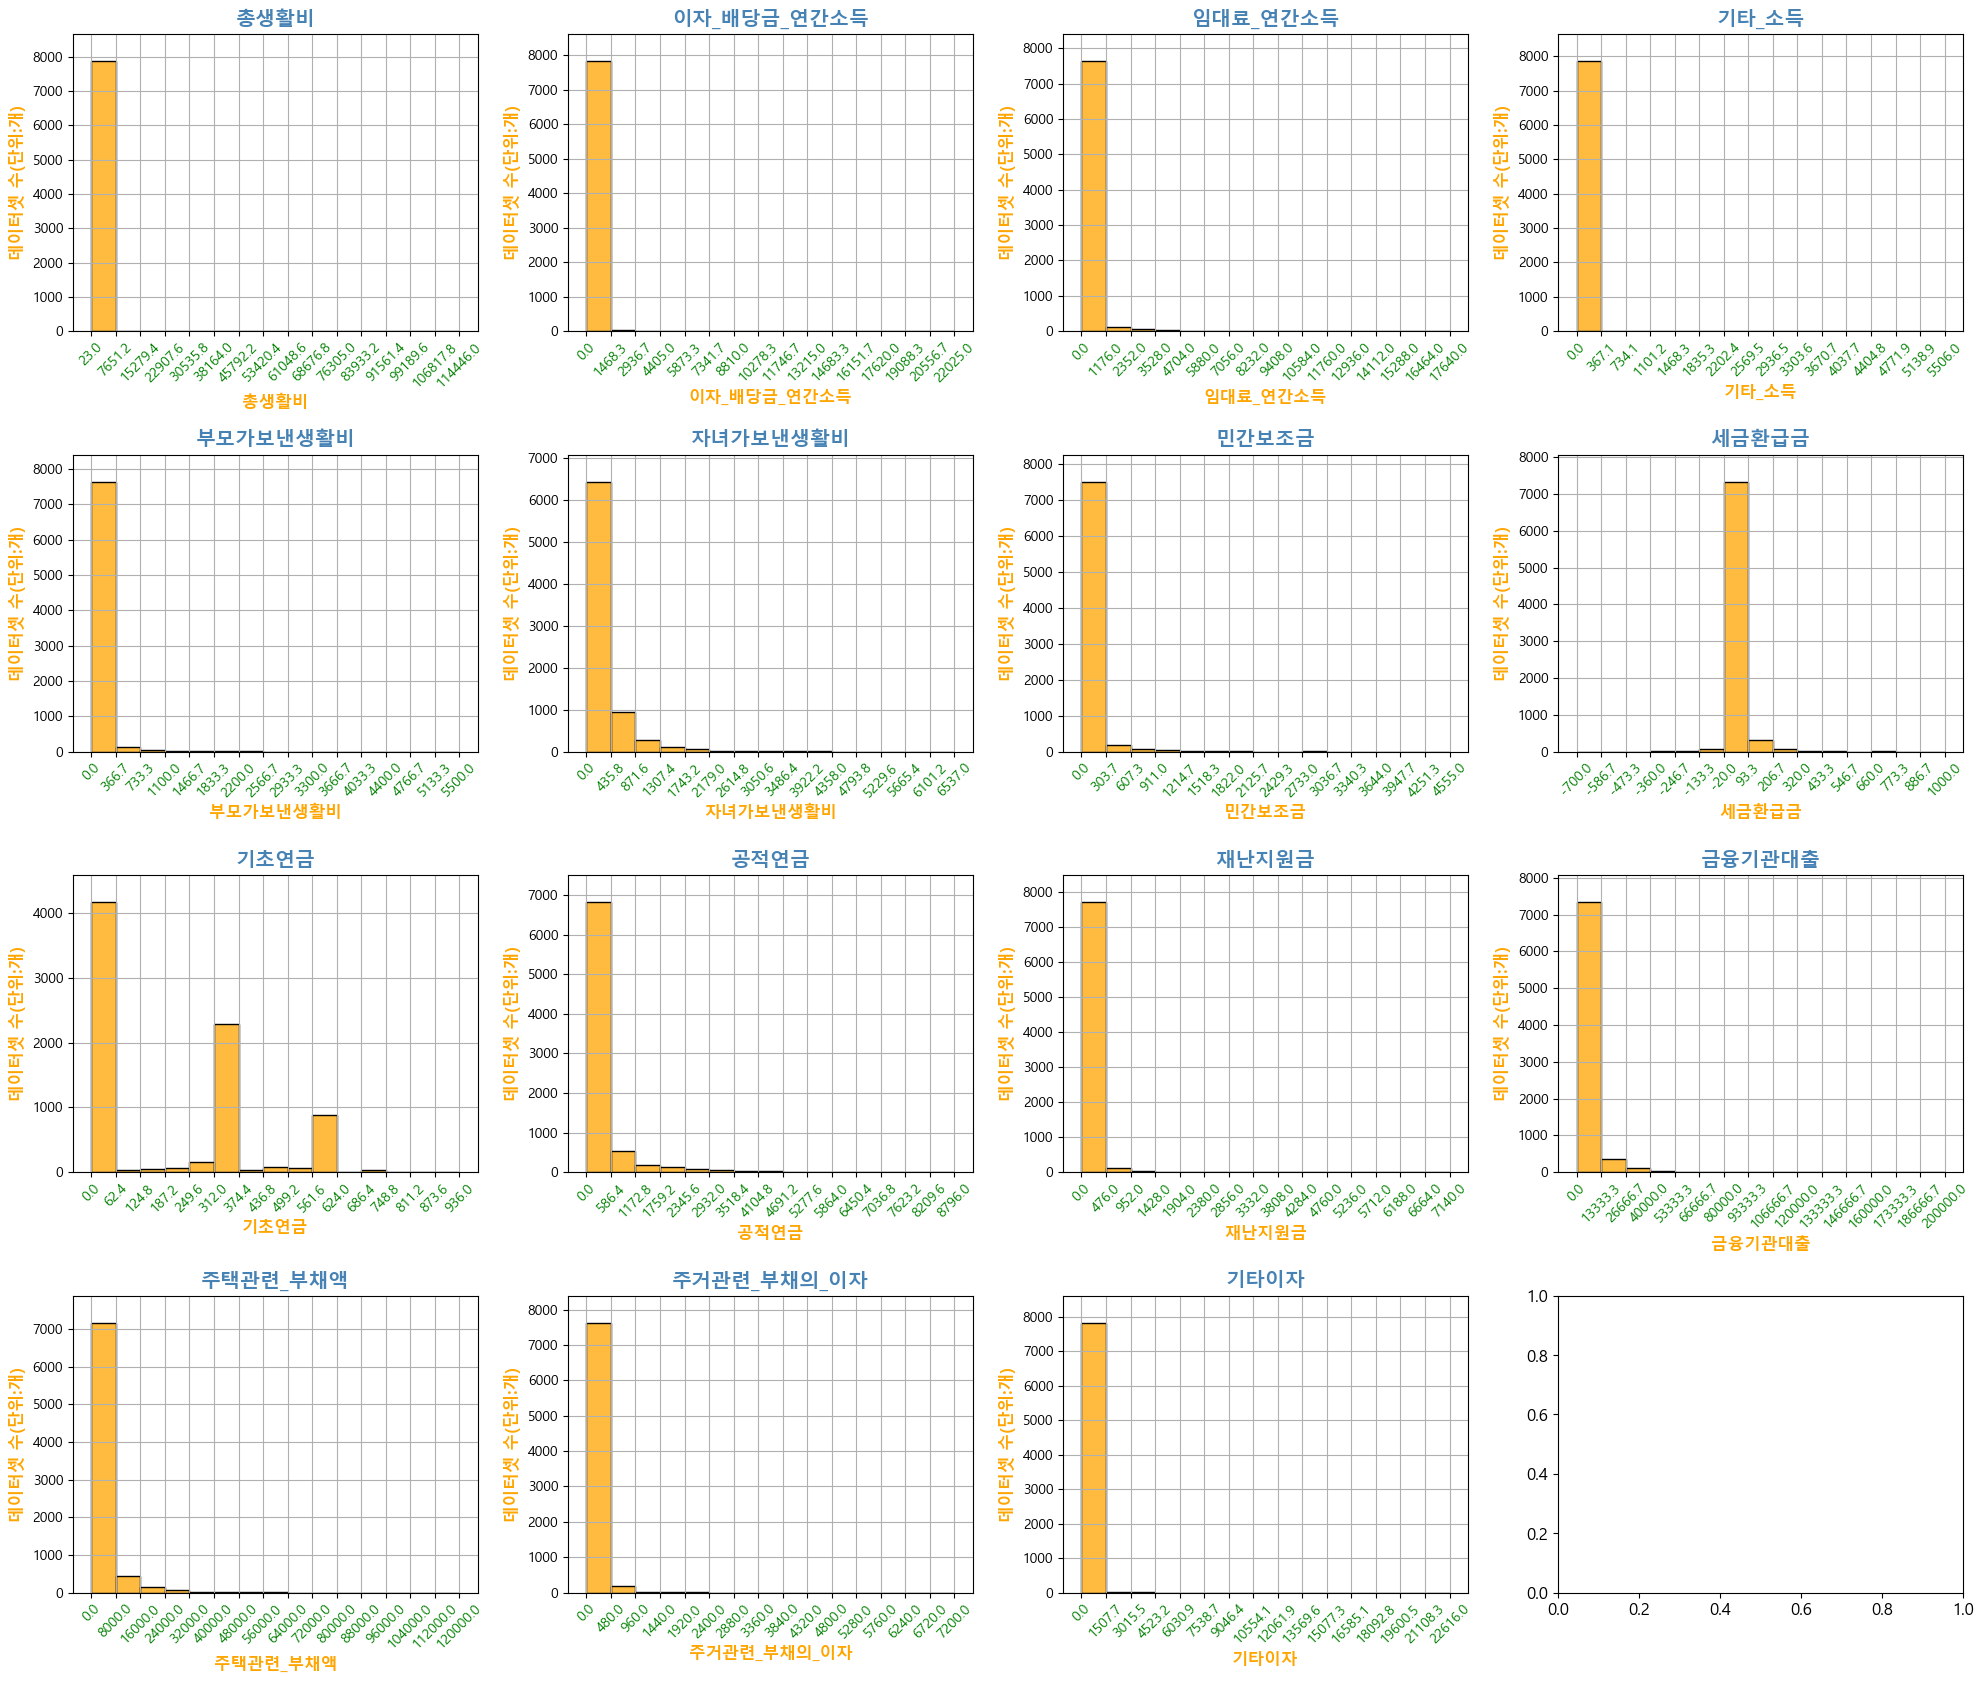

In [13]:
# 이상치 확인 위해 데이터를 정리해서 볼 수 있도록 도수분포표(히스토그램) 확인

# 히스토그램과 bins(구간) 설정
num_bins = 15 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 17))  # 5행 3열 서브플롯 생성

for ax, column in zip(axes.flat, re_df1.columns):
    hist, bins = np.histogram(re_df1[column], bins=num_bins)
    bins2 = np.round(bins, 1)

    sb.histplot(data=re_df1, x=column, bins=num_bins, kde=False, ax=ax,color='orange') #확률밀도곡선 미표시(티가 안 남)
    ax.set_title(column,color="steelblue",fontweight='bold')  # 각 subplot의 제목 설정
    ax.set_xticks(bins2)  # x축 눈금 설정
    ax.set_ylabel("데이터셋 수(단위:개)",color='orange',fontweight='bold') # y축 라벨명 변경, 폰트 색 및 굵기 변경
    ax.set_xlabel(column,color='orange',fontweight='bold') # y축 라벨명 변경, 폰트 색 및 굵기 변경
    ax.set_xticklabels(bins2, rotation=45, fontsize=10,color='green')  # x축 눈금 라벨(각도 45도), 폰트 설정
    ax.yaxis.set_tick_params(labelsize=10) #y축 폰트 설정

    # y축 범위 설정(여유 범위를 넣어야 가독성이 좋아짐)
    y_max = hist.max() + hist.max() * 0.1  # 최대 도수에 10% 여유를 더한 값으로 y축 최댓값 설정
    ax.set_ylim(0, y_max)  # y축 범위 설정
    ax.grid(True) # 격자 표시

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

> 결과

> - 각 컬럼별 최대값 때문에 도수분포가 비정상적으로 보이는 것으로 판단.
 
> - 변수들의 값이 15단계로 나눴음에도 불구하고 특정 분포에 상당히 치우쳐 있음을 확인함.

### #8-2.반복문과 sub plots을 이용해 regplot 조회

C:\Users\kiman\AppData\Local\Temp\ipykernel_21376\2919112175.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.96]) # 그래프 간격 조정 [왼쪽, 아래, 오른쪽, 위]


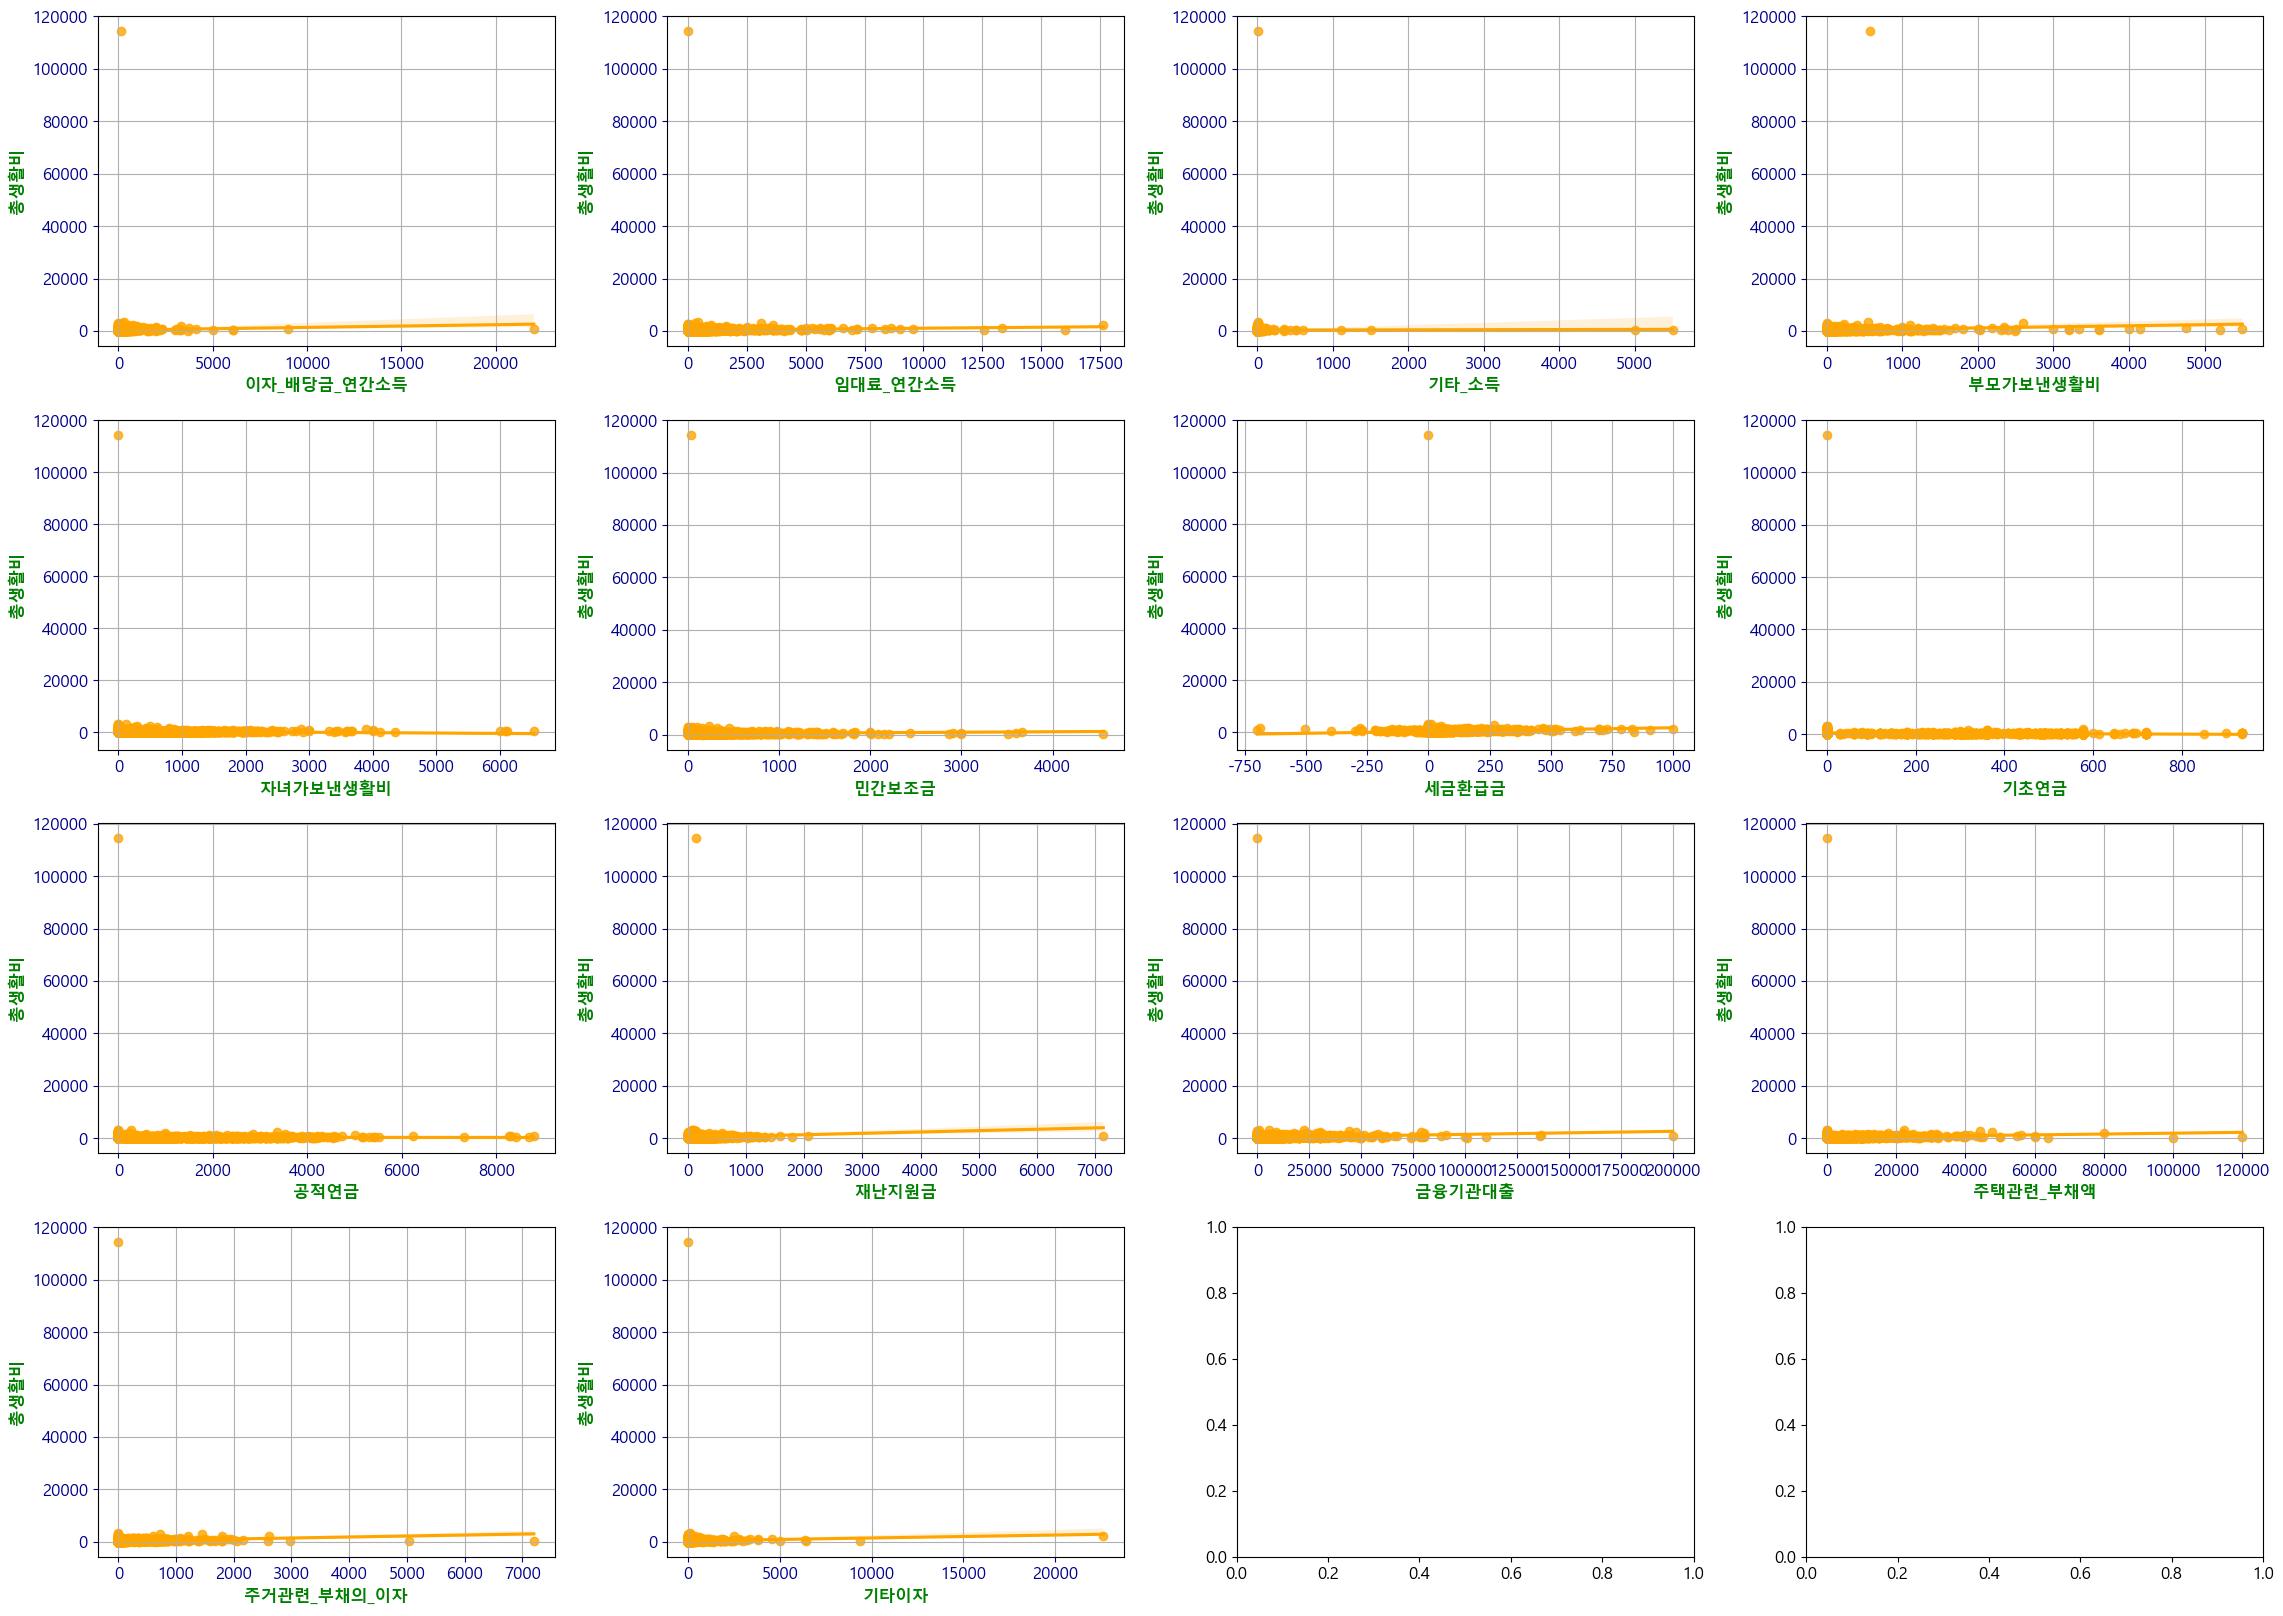

In [14]:
# index = 0부터 시작하면 '총생활비'-'총생활비' 그래프도 그리기 때문에 1부터 시작
columns = list(re_df1.columns)[1:]

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(23, 17)) #3행 5열의 서브플롯 생성

# y축을 종속변수인 총생활비로 고정 설정
dependent_variable = '총생활비'

for i, c in enumerate(columns):
    row, col = divmod(i, 4)
    sb.regplot(data=re_df1, y=dependent_variable, x=c, ax=ax[row, col],color='orange')
    ax[row, col].set_xlabel(c,color='green',fontsize=12,fontweight='bold')
    ax[row, col].set_ylabel(dependent_variable,color='green',fontsize=12,fontweight='bold')
    ax[row, col].tick_params(axis='x', colors='darkblue')  # x축 눈금 색상
    ax[row, col].tick_params(axis='y', colors='darkblue')  # y축 눈금 색상
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # 그래프 간격 조정 [왼쪽, 아래, 오른쪽, 위] 
    ax[row, col].grid() # 격자표시

plt.show()
plt.close()

> 결과
> - 기초통계량에서 보았던 각 컬럼별 최대값 때문에 정상적인 산점도를 보기 어려움.
> - 종속변수인 총생활비는 최대값에 의해 나머지 값들이 전부 몰려있는 것을 확인함.

## #8-3.반복문과 sub plot을 이용해 boxplot 조회

boxplot을 통해 이상치 제거 구간을 확인.

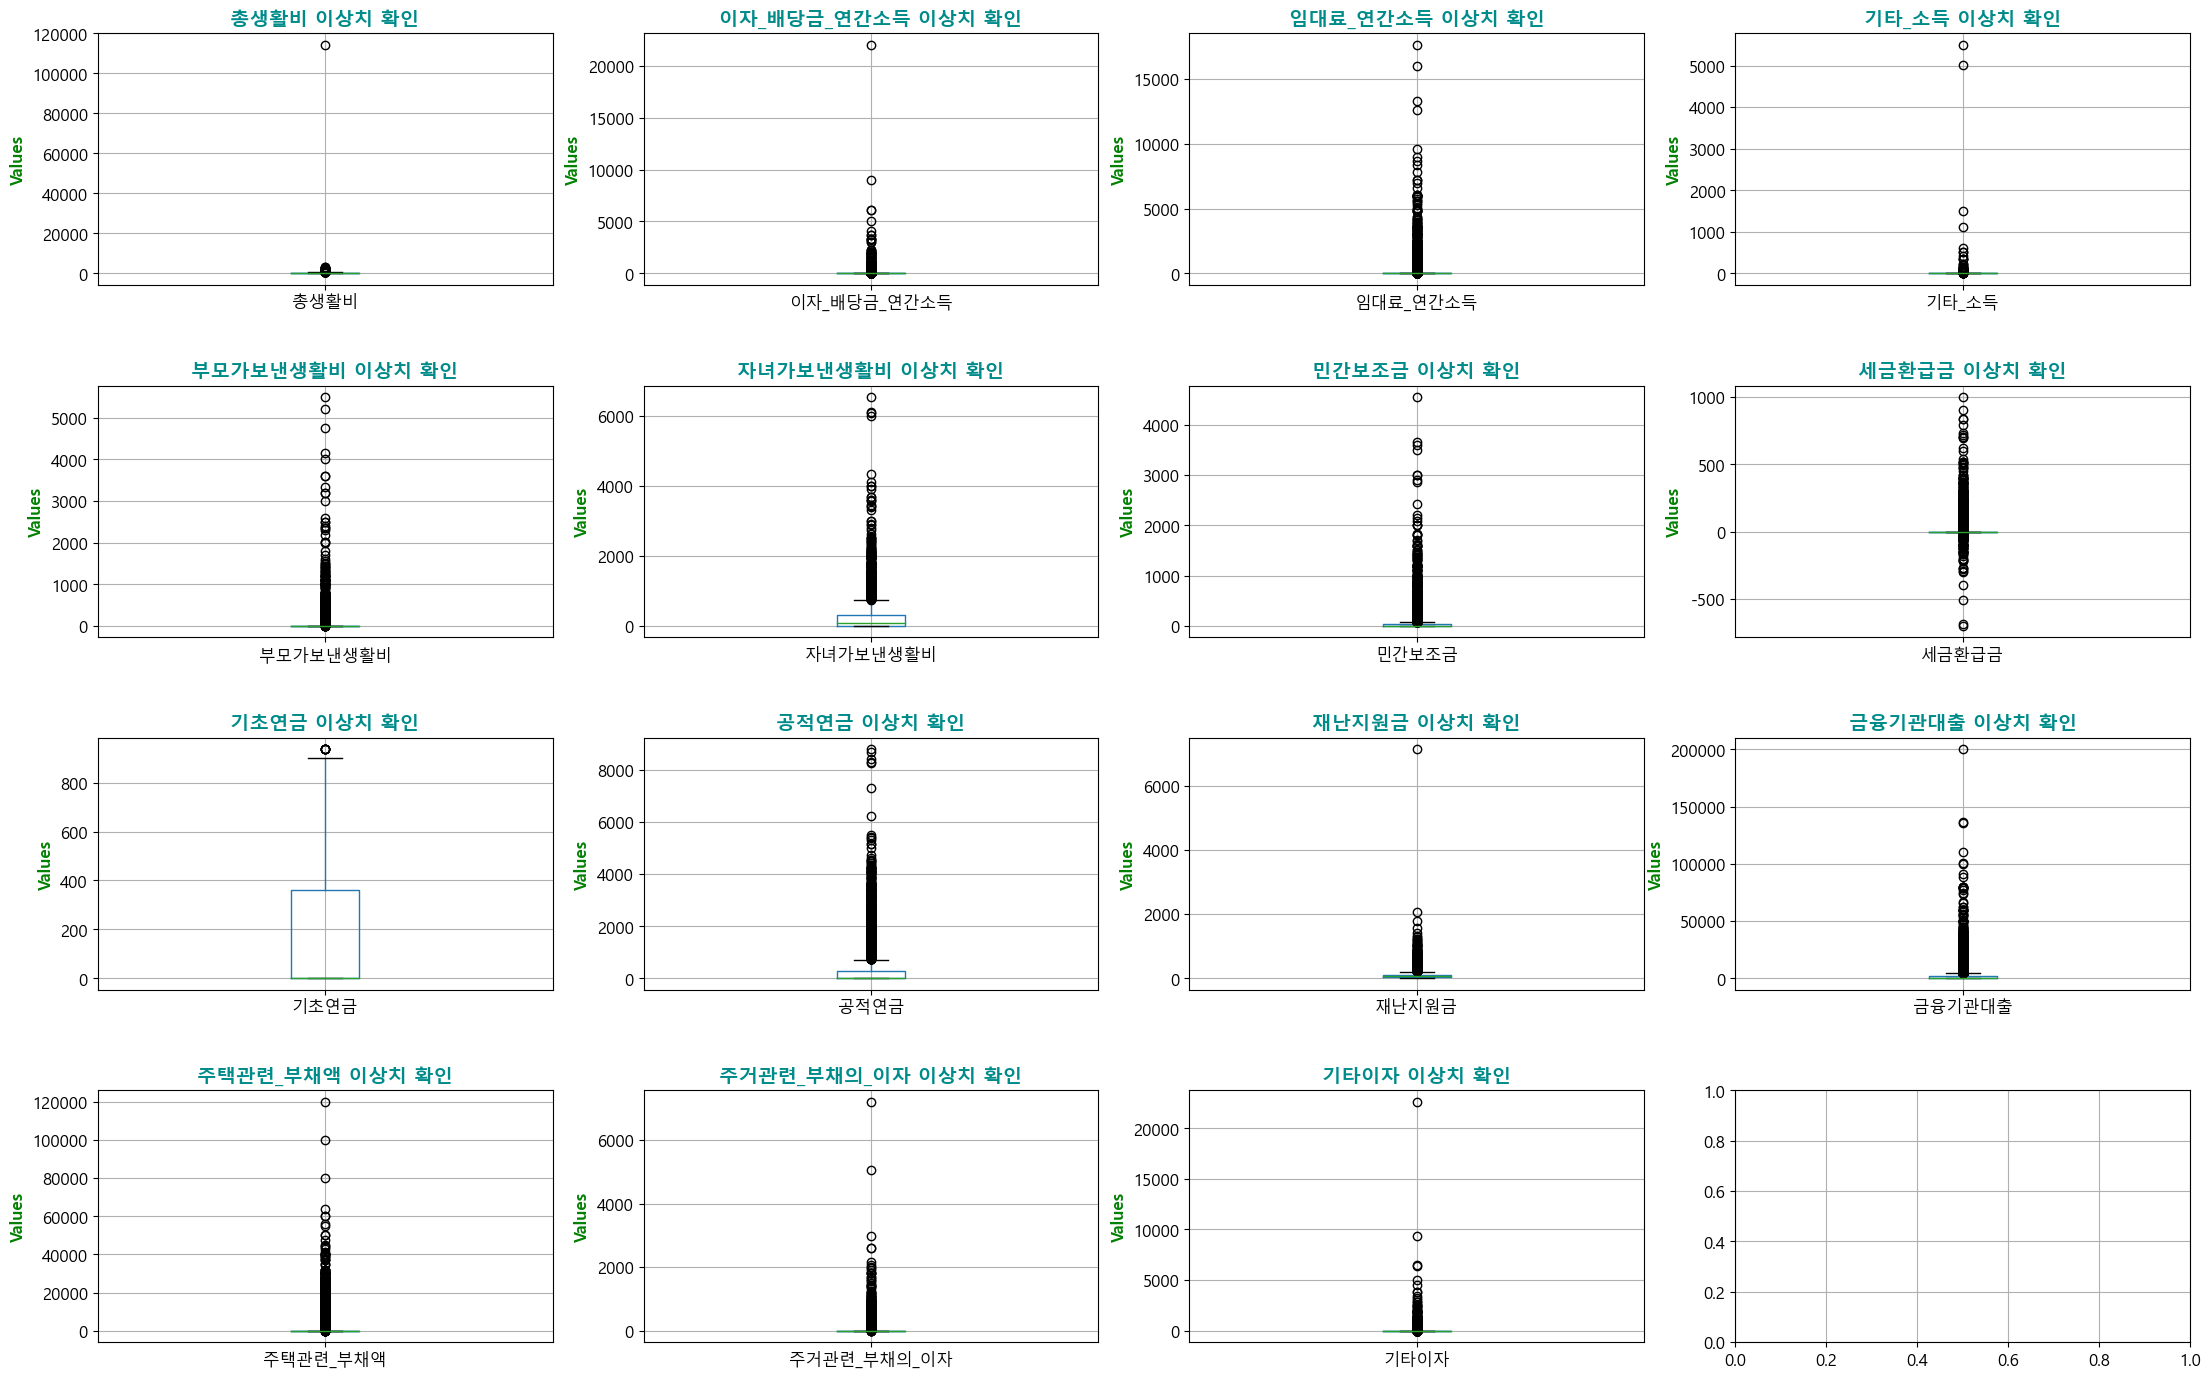

In [15]:
columns2 = list(re_df1.columns)[0:] #총생활비도 확인하기 새로운 변수 정의 후 0번째부터 시작

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(27, 17)) #3행 5열 boxplot 생성
for i, c in enumerate(columns2):
    row, col = divmod(i, 4)
    re_df1.boxplot(column=c, ax=ax[row, col])
    ax[row, col].set_title(f"{c} 이상치 확인",color='darkcyan',fontsize=14,fontweight='bold') # f포맷팅 이용
    ax[row, col].set_ylabel('Values', color='green', fontsize=12, fontweight='bold')
    plt.grid()
plt.subplots_adjust(hspace=0.4)  # hspace는 수직 간격 조절
plt.show()

> 결과

> 1) 종속변수(총생활비)에서 1건만 비정상적으로 높은 수치를 제거하고 진행.
> 2) 독립변수들 중 이상치는 주관적 판단으로 범위를 선정 후 제거하기로 결정.

## #8-4.이상치 행 제외하고 재조회

In [16]:
#이상치 행 제외하고 재조회
df2=re_df1.query('(총생활비 < 100000) and (이자_배당금_연간소득 < 20000) and (기타_소득 < 4900) and \
                 (금융기관대출 < 190000) and (재난지원금 < 7000)') #쿼리 함수의 경우 문단 길어져서 엔터로 넘길 시 \ -> 역슬래시 활용해야함
df2.shape[0] #shape 함수를 이용해 데이터 셋만 간략적으로 확인

7859

> 가구 수가 7859건으로 변경 된것을 알 수 있다.

## #8-5.추세선이 올라오는지 regplot으로 재확인 
> (boxplot은 이상치가 계속 표시될 것이기 때문에 생략)

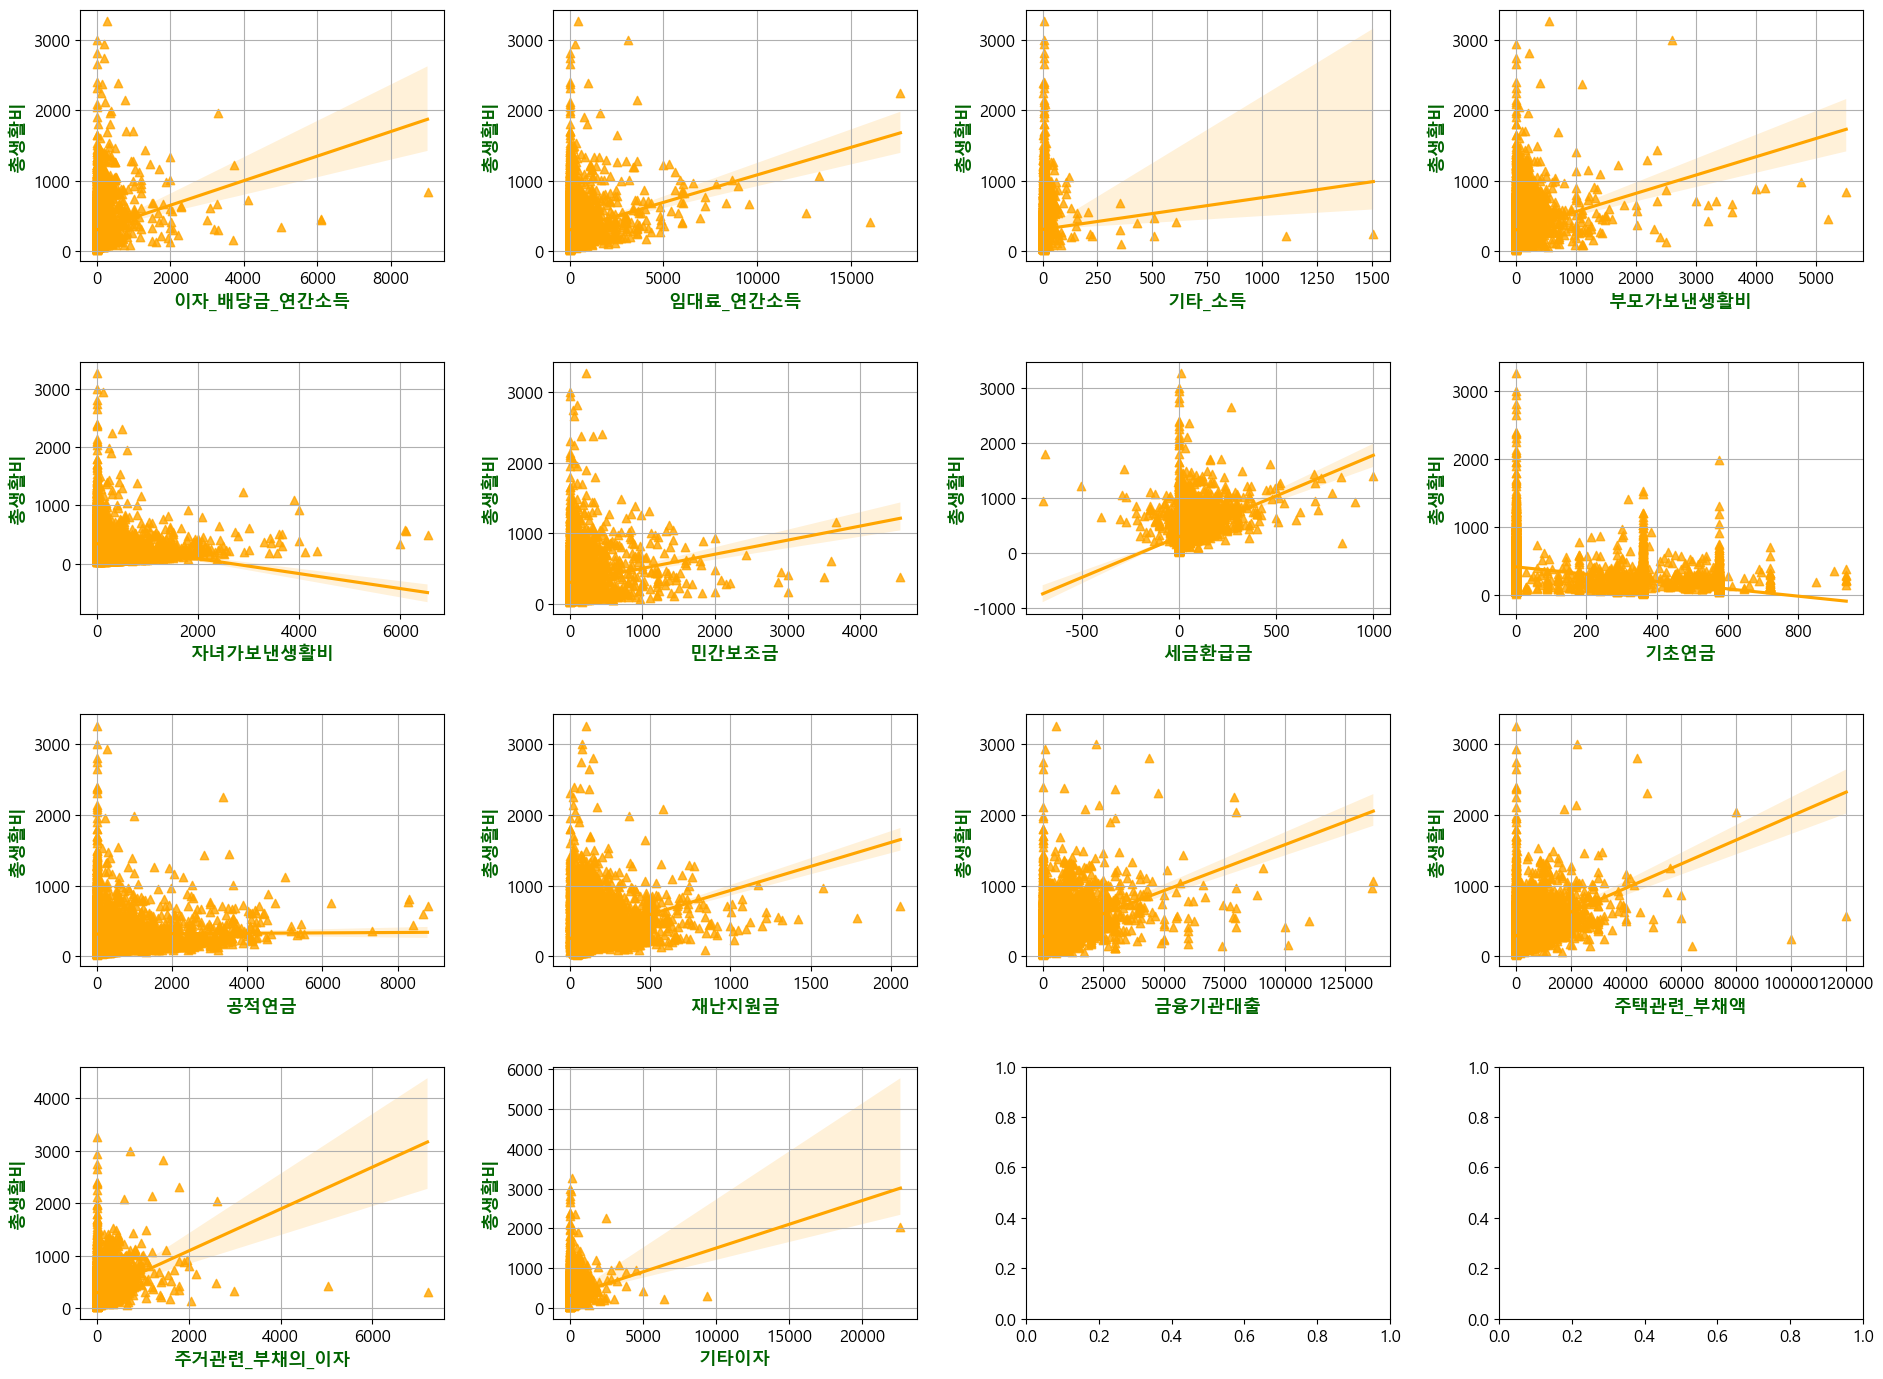

In [17]:
# index = 0부터 시작하면 '총생활비'-'총생활비' 그래프도 그리려고 시도함
columns = list(df2.columns)[1:]

# 4행 2열로 8개의 서브플롯 그래프 그리기
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(23, 17)) #3행 5열 subplot 생성

# 종속변수 설정
dependent_variable = '총생활비'

for i, c in enumerate(columns):
    row, col = divmod(i, 4)
    sb.regplot(data=df2, y=dependent_variable, x=c, ax=ax[row, col],marker='^',color='orange')
    ax[row, col].set_xlabel(c,color='darkgreen',fontweight='bold',fontsize=13)
    ax[row, col].set_ylabel(dependent_variable,color='darkgreen',fontweight='bold',fontsize=13)
    ax[row, col].grid()
plt.subplots_adjust(wspace=0.3,hspace=0.4) #그래프 간격조절, wspace=수평, hspace=수직
plt.show()
plt.close()

> 결과<br>
> 추세선이 올라온 것을 확인 가능

## #8-6.히스토그램 그래프로 분포도 재확인

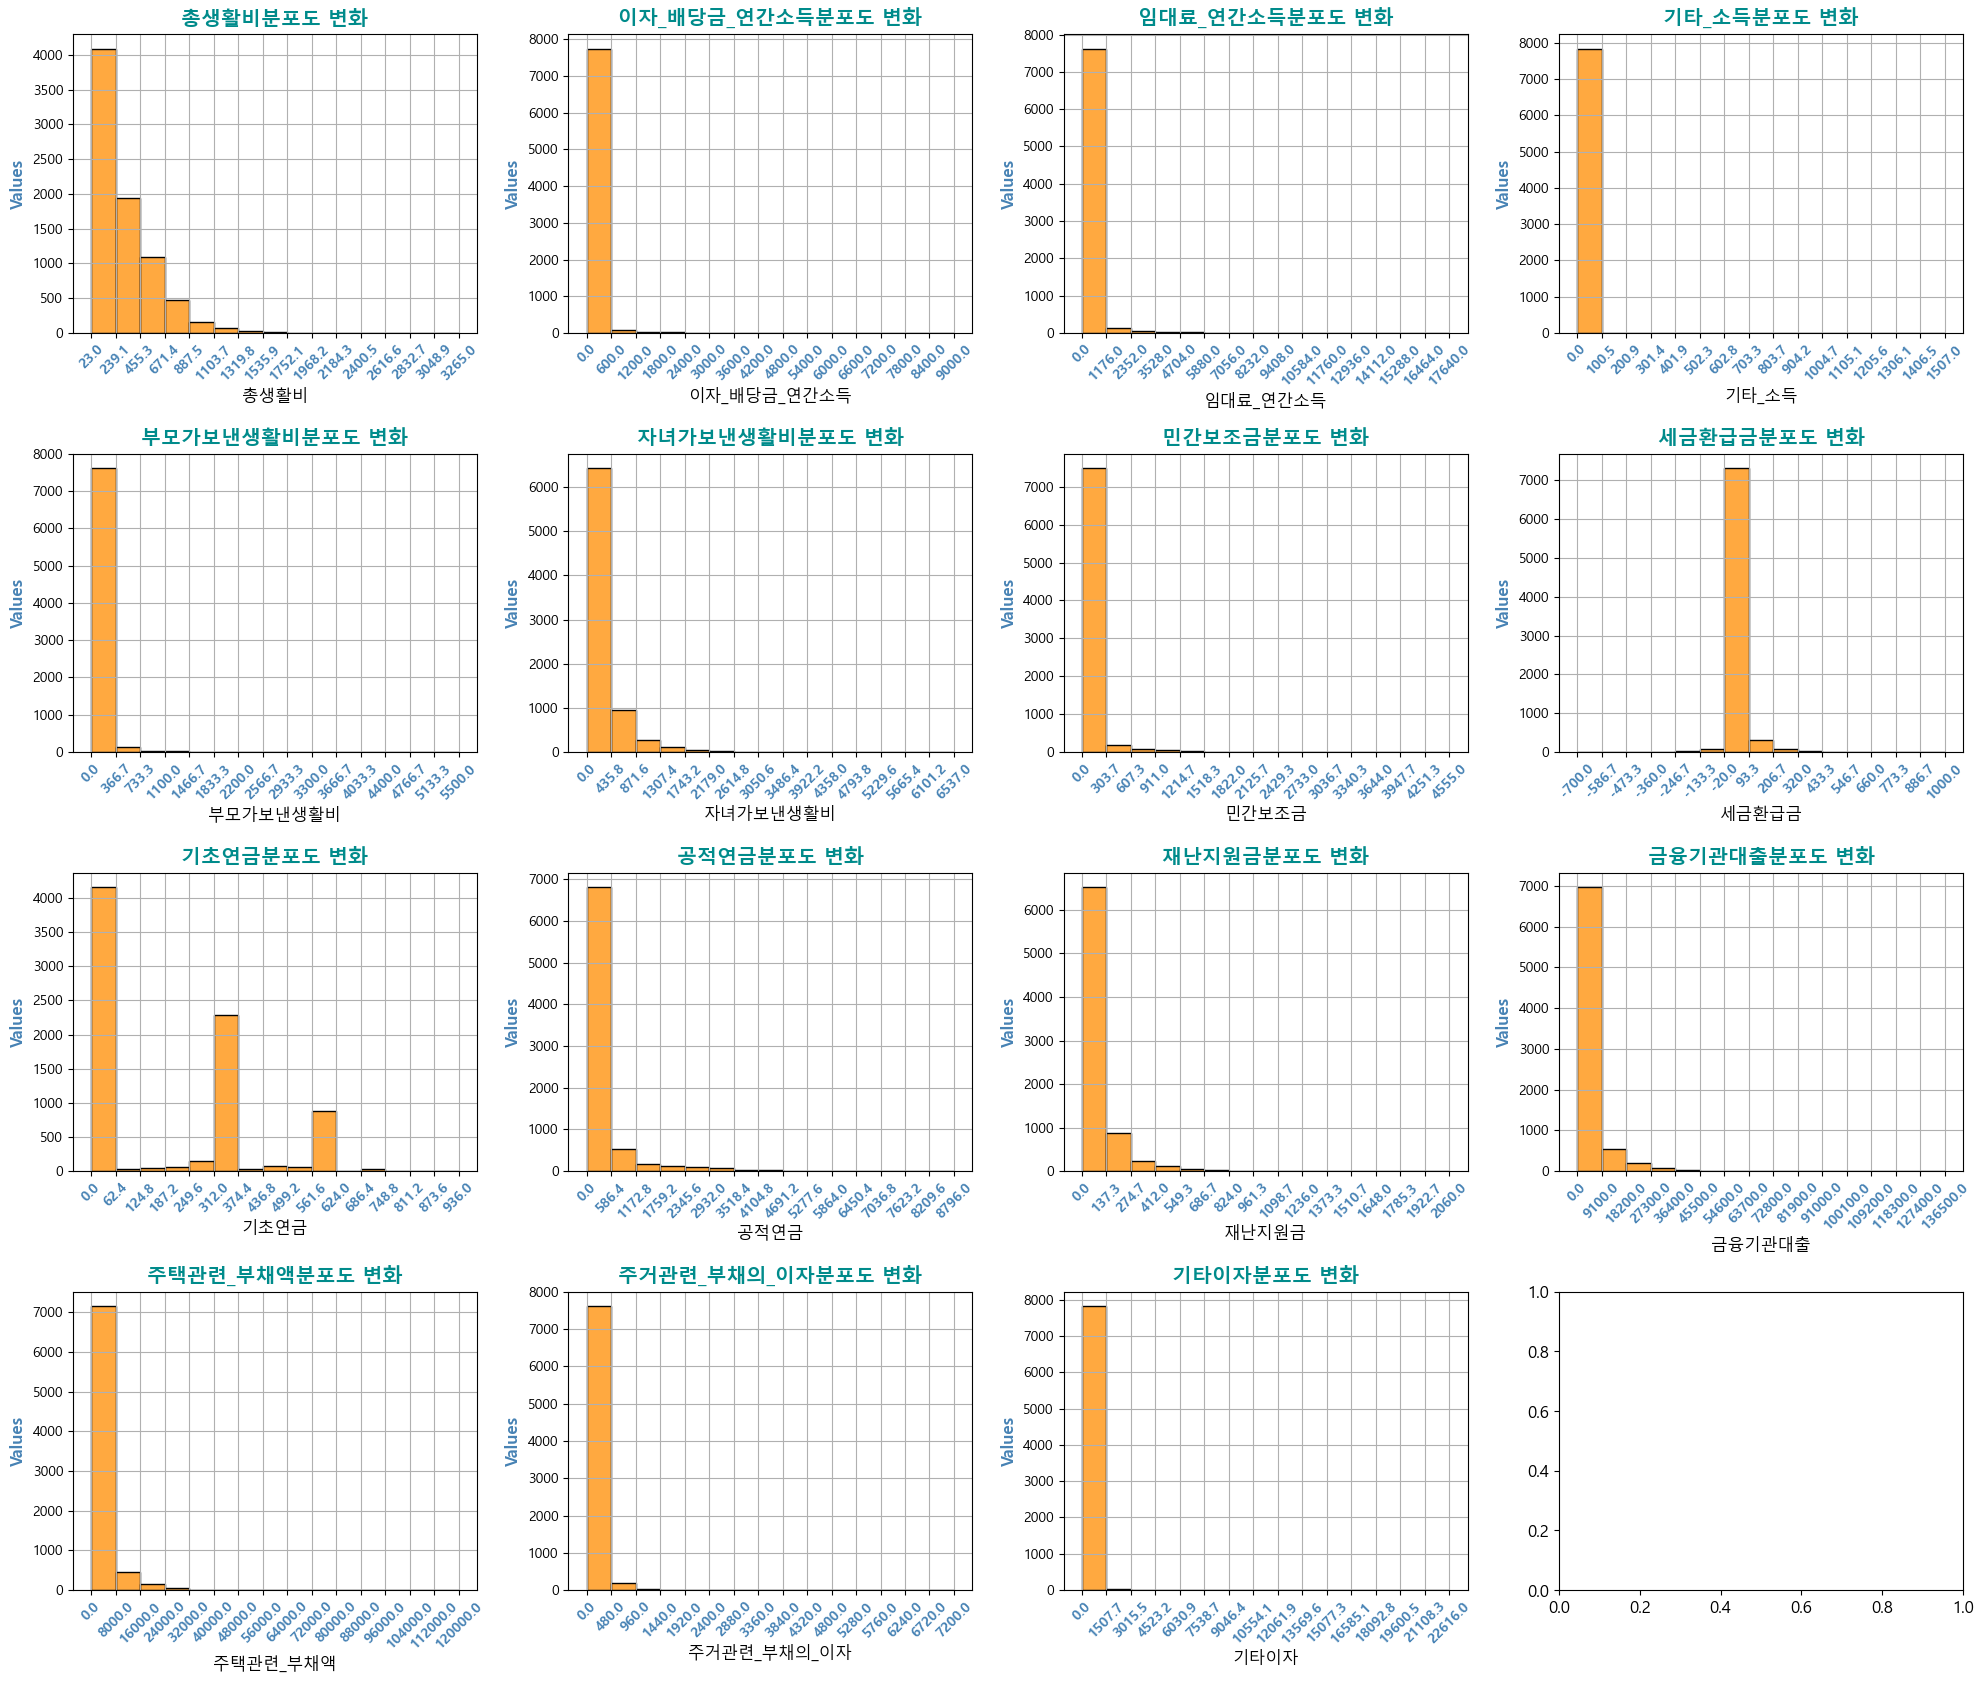

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 17)) #3행 5열 subplots 생성

for ax, column in zip(axes.flat, df2.columns):
    hist, bins = np.histogram(df2[column], bins=15)
    bins2 = np.round(bins, 1)

    sb.histplot(data=df2, x=column, bins=15, kde=False, ax=ax,color='darkorange')
    ax.set_title(f"{column}분포도 변화",color='darkcyan',fontweight='bold')  # 각 subplot의 제목 설정
    ax.set_xticks(bins2)  # x축 눈금 설정
    ax.set_xticklabels(bins2, rotation=45, fontsize=10,color='steelblue',fontweight='bold')  # x축 눈금 라벨 설정 (각도 45도)
    ax.set_ylabel("Values",color='steelblue',fontweight='bold')
    ax.yaxis.set_tick_params(labelsize=10) #y축 폰트 사이즈 설정
    ax.grid(True)

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

> 결과

> 이전보다 분포도가 나아졌음을 확인
> 총생활비의 경우 절반 이상의 가구가 월 239만원 이하에 분포되어 있음을 알 수 있다.

# #9.신뢰구간 확인

- 모집단: 대한민국 전체 가구 
- 모수: 대한민국 전체 가구 당 해당 엑셀파일의 종속,독립 변수들 수치
- 표본: 모집단의 일부(ex: 대한민국 전체가구 중 7830가구 선발)
- 통계량: 표본 7830가구의 월 평균 총생활비

> 신뢰구간을 구함으로 대한민국 전체 가구 모수의 종속변수, 독립변수 추정값 범위를 추측하는 데에 의미가 있다고 판단.

In [19]:
df2Col = list(df2.columns)
for cc in df2Col:
    print("%s 신뢰구간95%%"%cc)
    helper.getConfidenceInterval(df2["%s"%cc])

총생활비 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    309.149 |
| 상한 |    321.099 |
+------+------------+
이자_배당금_연간소득 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |     47.332 |
| 상한 |    58.1386 |
+------+------------+
임대료_연간소득 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |     114.97 |
| 상한 |    143.471 |
+------+------------+
기타_소득 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    6.53954 |
| 상한 |    7.70112 |
+------+------------+
부모가보낸생활비 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    41.0606 |
| 상한 |    50.7401 |
+------+------------+
자녀가보낸생활비 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    221.624 |
| 상한 |    239.844 |
+------+------------+
민간보조금 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    53.7174 |
| 상한 |    62.6844 |
+------+------------+
세금환급금 신뢰구간95%
+-----

> 각 변수별 상한, 하한 95%의 신뢰구간 확인 완료

## #9-1.신뢰구간 시각화

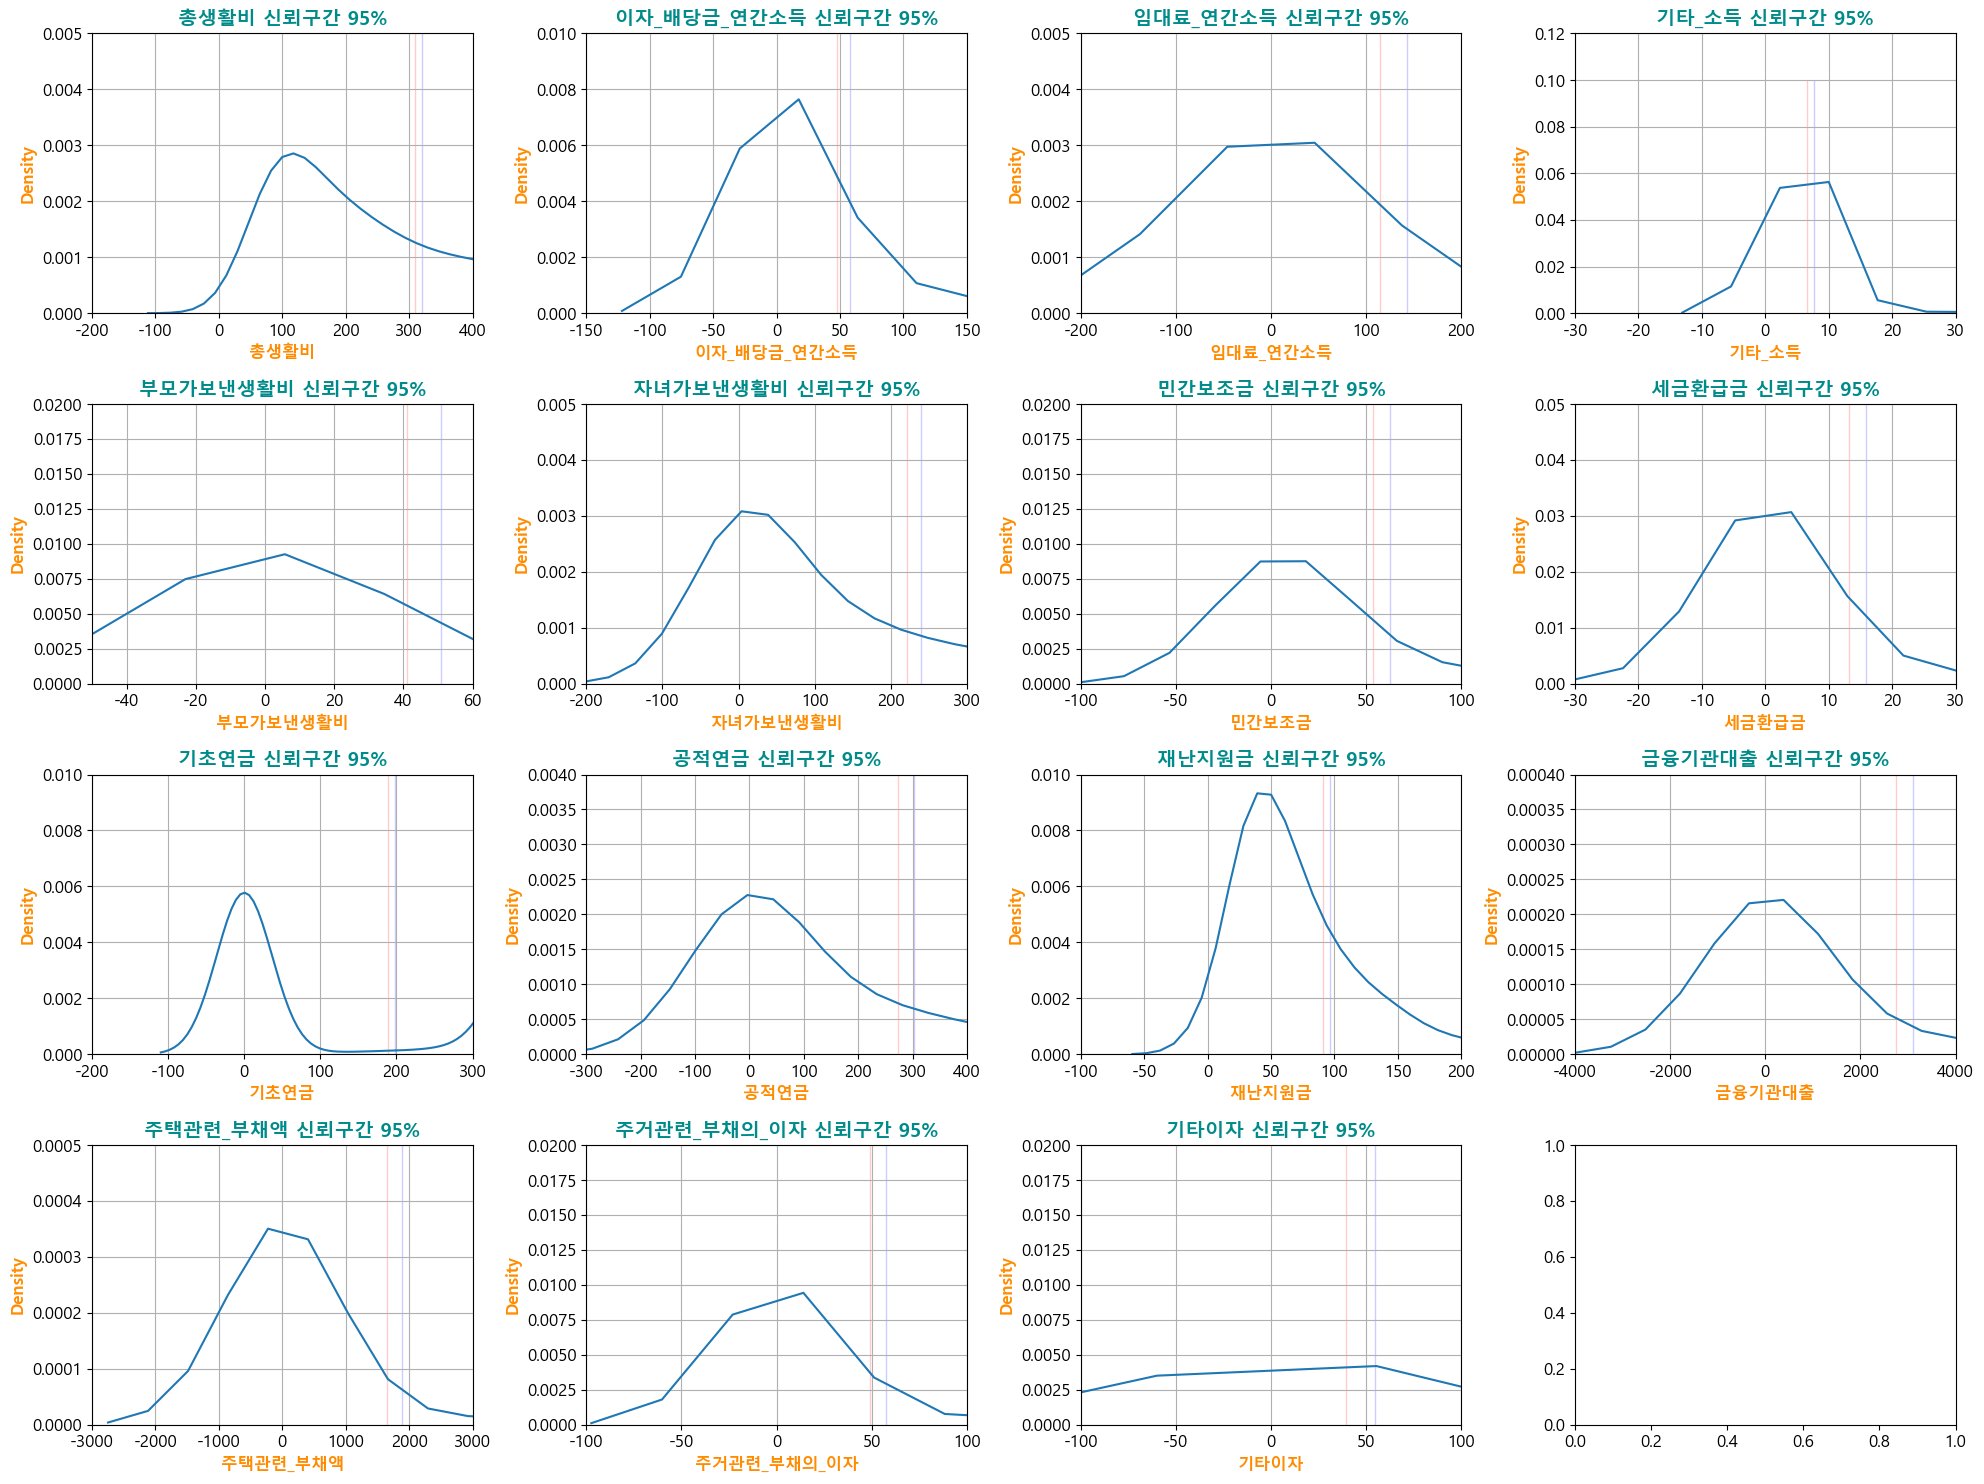

In [20]:
# 변수명 리스트 생성
variables = df2.columns

# 각 변수별 x, y 범위 정의
x_ranges = {
    '총생활비': (-200,400),
    '이자_배당금_연간소득': (-150,150),
    '임대료_연간소득': (-200,200),
    '기타_소득': (-30,30),
    '부모가보낸생활비':(-50, 60),
    '자녀가보낸생활비':(-200, 300),
    '민간보조금':(-100, 100),
    '세금환급금': (-30,30),
    '기초연금':(-200, 300),
    '공적연금': (-300,400),
    '재난지원금': (-100, 200),
    '금융기관대출': (-4000,4000),
    '주택관련_부채액': (-3000,3000),
    '주거관련_부채의_이자': (-100,100),
    '기타이자': (-100, 100)
}

y_ranges = {
    '총생활비': (0,0.005),
    '이자_배당금_연간소득': (0,0.01),
    '임대료_연간소득': (0,0.005),
    '기타_소득': (0,0.12),
    '부모가보낸생활비': (0, 0.02),
    '자녀가보낸생활비': (0, 0.005),
    '민간보조금': (0, 0.02),
    '세금환급금': (0,0.05),
    '기초연금': (0, 0.01),
    '공적연금': (0, 0.004),
    '재난지원금': (0, 0.01),
    '금융기관대출': (0,0.0004),
    '주택관련_부채액': (0,0.0005),
    '주거관련_부채의_이자': (0,0.02),
    '기타이자': (0, 0.02)
}

# 신뢰구간 계산
confidence_level = 0.95
confidence_intervals = {}  # 각 변수별 신뢰구간을 저장할 딕셔너리

for var in variables:
    sample = df2[var]
    n = len(sample)
    sample_mean = sample.mean()
    sample_std = sample.std(ddof=1)
    std_error = sample_std / sqrt(n)
    
    t_value = t.ppf((1 + confidence_level) / 2, df=n-1)
    margin_of_error = t_value * std_error
    
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    confidence_intervals[var] = (lower_bound, upper_bound)

# subplot 설정
# num_rows = (len(variables) + 2) // 3  # 3열로 subplot 배치
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,15))

# 신뢰구간 시각화
for ax, var in zip(axes.flat, variables):
    cmin, cmax = confidence_intervals[var]  # 하한과 상한
    sb.kdeplot(data=df2, x=var, ax=ax)
    sb.lineplot(x=[cmin, cmin], y=[0, 0.1], color='red', ax=ax)
    sb.lineplot(x=[cmax, cmax], y=[0, 0.1], color='blue', ax=ax)
    ax.set_xlabel(var, fontsize=12, fontweight='bold', color='darkorange')
    ax.set_ylabel('Density', fontsize=12, fontweight='bold', color='darkorange')
    ax.set_title(f'{var} 신뢰구간 95%',fontsize=14, fontweight='bold', color='darkcyan')
    ax.set_xlim(x_ranges[var])  # x축 범위 확장
    ax.set_ylim(y_ranges[var])  # y축 범위 설정
    ax.grid(True)  # 격자 표시

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

# #10.pairplot 그래프로 각 요인(변수)간 상관관계 확인

In [21]:
# plt.figure(figsize=(30, 20))
# sb.pairplot(data=df2, vars=columns, kind='reg')
# plt.show()
# plt.close()

# 데이터 양이 많아 산점도 행렬 이미지 표출까지 오랜시간이 걸려 한번 표출 후 이미지 저장 및 마크다운 형식으로 보여주는 것으로 대체.
# 해당 코드는 주석 처리

> 그래프 시각화(파일첨부)

![img](output.png)

> 결과

> 확인 결과 시간도 오래 걸리고 그래프가 작아 보기가 힘들다. 다만 해당 그래프를 통해 몇가지 확인할 수 있는 사실이 있다.

 >> 몇몇 요인들간에 상관관계가 확인됨

 >> 금융기관대출-주택관련부채액-주거관련_부채의_이자 간에 상관관계가 있음을 확인 할 수 있음. 다만 이 부분은 대출액이 커질수록 이자도 당연히 커지기 때문에 당연하다고 볼 수 있음.

 >> 독립변수 중 하나인 `기초연금`의 경우 대부분의 변수들과 반비례함을 확인 할 수 있었음

# #11.정규분포 가정 구하기(정규성 검사)

대량의 데이터를 사용한다는 가정으로 일반적인 정규성 검정 진행하지 않기로 계획.

차선책으로 왜도와 첨도를 구해 정규분포를 따르는지 확인.

### #11-1. 왜도

분포의 비대칭도.

| 구분 | 내용 |
|---|---|
| 정규분포 | $왜도=0$ |
| 왼쪽으로 치우침 | $왜도 > 0$ |
| 오른쪽으로 치우침 | $왜도 < 0$ |

종속변수인 총생활비는 제외

종속변수는 분석의 대상이 되는 특별한 변수

종속변수의 분포 특성을 파악하는 것은 회귀분석 같은 다른 분석 기법으로 처리될 수 있기 때문

### #11-2. 첨도

확률분포의 뾰족한 정도.

Fisher = True 

   - 첨도 기준이 Fisher (normal ==> 0.0) 이다.
   - 정규분포의 첨도 = 0이다. 


| 구분 | 내용 |
|---|---|
| 정규분포 | $첨도 = 0$ |
| 위로 뾰족함 | $첨도 > 0$ |
| 아래로 뾰족함 | $첨도 < 0$ |

첨도 구하기.종속변수인 총생활비는 제외

이유는 상기 왜도와 같음

In [22]:
#왜도,첨도 확인 코드

SkewKurtosis_df = pd.DataFrame(columns=['변수명', '정규분포 왜도', '정규분포 첨도'])
for column in df2.columns:
    if column != '총생활비':
        skewness = skew(df2[column])
        kurtosisness = kurtosis(df2[column],fisher=True)
        SkewKurtosis_df = pd.concat(
            [SkewKurtosis_df, pd.DataFrame({'변수명': [column],
            '정규분포 왜도': [skewness.round(3)],                          # 소수점 셋째자리까지만 나오게
            '정규분포 첨도': [kurtosisness.round(3)]})], ignore_index=True # 소수점 셋째자리까지만 나오게
        )
SkewKurtosis_df

,변수명,정규분포 왜도,정규분포 첨도
0,이자_배당금_연간소득,16.080,398.172
1,임대료_연간소득,11.470,199.716
2,기타_소득,38.127,1832.707
3,부모가보낸생활비,12.077,204.786
4,자녀가보낸생활비,4.408,36.134
5,민간보조금,8.621,110.507
6,세금환급금,5.110,60.736
7,기초연금,0.517,-1.189
8,공적연금,4.467,28.361
9,재난지원금,4.887,38.836


In [23]:
# 왜도,첨도 확인 코드 ver2
# 데이터프레임의 셀 글자를 가운데 정렬 및 소수 셋째 자리까지만 표현하도록 유도
# styled_df = SkewKurtosis_df.style.set_properties(**{'text-align': 'center'})\
#                                 .set_table_styles([
#                                     {'selector': 'th.col_heading', 'props': [('text-align', 'center')]}])\
#                                 .format({'정규분포 왜도': '{:.3f}', '정규분포 첨도': '{:.3f}'})
# styled_df

### #11-3 검사 결과

> 왜도

- `기초연금`을 제외한 나머지 독립변수 분포는 정규분포를 따르지 않는다고 판단.
- 각 변수의 왜도값이 0보다 커 위쪽으로 뾰족하다는 것은 데이터가 특정 값에 치우쳐 있다는 것을 의미.
- 다만, 기초통계량을 보면 알 수 있듯 각 변수의 수치값 편차가 크고 최소값이 "0"인 경우가 많음.
- 해당 데이터는 국민들을 대상으로 한 실제 데이터 값이기 때문에 정규분포를 따르지 않을 수 있음을 염두해야 한다고 판단됨.

> 첨도

- `기초연금`을 제외한 나머지 독립변수 분포는 정규분포를 따르지 않음을 확인.
- 각 변수의 첨도값이 0보다 크므로 위쪽으로 뾰족하다는 것을 의미함.
- 다만, 기초통계량(describe) 확인 시 각 변수 별 수치의 편차가 크고 최소값이 "0"인 경우가 많음.
- 해당 데이터는 국민들을 대상으로 한 실제 기반의 데이터이기 때문에 정규분포를 따르지 않을 수 있음을 염두해야 할 것으로 판단됨.

# #12. 스피어만 상관분석 및 히트맵

왜도,첨도 검사 결과 독립 변수 하나를 제외한 나머지는 전부 정규분포를 따르지 않음을 확인.

비선형적 관계, 정규분포를 따르지 않기 때문에 상관관계를 확인하기 위해 스피어만 상관분석을 이용.

히트맵 그래프로 요인들간에 상관관계 정도를 확인.

In [24]:
helper.spearman_r(df2)

+-----------------------------------------+-------------+--------------+----------+
| fields                                  |   statistic |       pvalue | result   |
|-----------------------------------------+-------------+--------------+----------|
| 총생활비 vs 이자_배당금_연간소득        |    0.214765 |  1.13631e-82 | True     |
| 이자_배당금_연간소득 vs 임대료_연간소득 |    0.175856 |  1.29281e-55 | True     |
| 임대료_연간소득 vs 기타_소득            |   0.0997323 |  7.85451e-19 | True     |
| 기타_소득 vs 부모가보낸생활비           |    0.120537 |  7.92972e-27 | True     |
| 부모가보낸생활비 vs 자녀가보낸생활비    |   -0.467324 |            0 | True     |
| 자녀가보낸생활비 vs 민간보조금          |   -0.153996 |  6.55878e-43 | True     |
| 민간보조금 vs 세금환급금                |    0.110892 |  6.23443e-23 | True     |
| 세금환급금 vs 기초연금                  |   -0.278614 | 4.42618e-140 | True     |
| 기초연금 vs 공적연금                    |    0.193484 |  3.71118e-67 | True     |
| 공적연금 vs 재난지원금                  |  -0.0450092 |  6.56581e-05 | True     |
| 재난지원금 vs 금융기관대출        

In [25]:
helper.pearson_r(df2)

+-----------------------------------------+-------------+--------------+----------+
| fields                                  |   statistic |       pvalue | result   |
|-----------------------------------------+-------------+--------------+----------|
| 총생활비 vs 이자_배당금_연간소득        |    0.157352 |  9.56283e-45 | True     |
| 이자_배당금_연간소득 vs 임대료_연간소득 |   0.0863107 |  1.79361e-14 | True     |
| 임대료_연간소득 vs 기타_소득            |  0.00855357 |     0.448346 | False    |
| 기타_소득 vs 부모가보낸생활비           |  0.00753973 |     0.503937 | False    |
| 부모가보낸생활비 vs 자녀가보낸생활비    |   -0.114209 |  3.10278e-24 | True     |
| 자녀가보낸생활비 vs 민간보조금          |  -0.0628261 |  2.48648e-08 | True     |
| 민간보조금 vs 세금환급금                |   0.0492383 |  1.25974e-05 | True     |
| 세금환급금 vs 기초연금                  |   -0.174238 |   1.2971e-54 | True     |
| 기초연금 vs 공적연금                    |  -0.0870933 |  1.03907e-14 | True     |
| 공적연금 vs 재난지원금                  |  -0.0477319 |  2.30367e-05 | True     |
| 재난지원금 vs 금융기관대출        

> 결과

> p.value값이 모두 0.05 이하로 통계적으로 유의함을 확인함

> 이는 변수들 간의 순위 상의 관계가 우연이 아니라 실제로 존재한다고 말할 수 있음

> 또한 부모가 보낸 생활비와 자녀가 보낸 생활비 요인은 음의 관계로 서로 상충관계인 것을 알 수 있음

# #13. Heatmap으로 변수별 상관관계 확인

In [26]:
corr = df2.corr(method='spearman')
# corr.head()

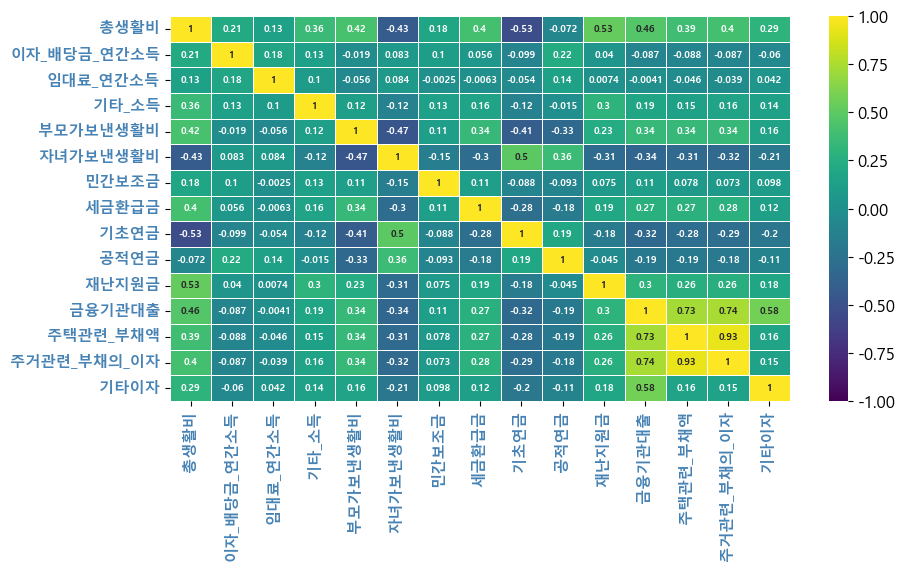

In [27]:
plt.rcParams["figure.figsize"] = (10,5)

corr1=sb.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'viridis', #색상(viridis, plasma, coolwarm, Greys,Purples,Blues,Greens,Oranges,Reds,OrRd,PuRd,RdPu,BuPu,GnBu,PuBu,YlGnBu,PuBuGn,BuGn,YlGn)
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5, #구분선 굵기
           annot_kws={"size": 7, 'weight':'bold'}  # 글자 크기 조정
           
)
corr1.set_xticklabels(corr1.get_xticklabels(), fontsize=11, fontweight='bold', color='steelblue') #히트맵을 변수에 담고 이런식으로 label 수정 가능
corr1.set_yticklabels(corr1.get_yticklabels(), fontsize=11, fontweight='bold', color='steelblue') #히트맵을 변수에 담고 이런식으로 label 수정 가능
plt.show()
plt.close()

### #13-1. 히트맵 결과

`금융기관대출`, `주택관련_부채액`, `주거관련_부채의_이자가` 높은 상관성을 나타내는 것을 확인.

해당 변수를 제거 후 히트맵을 사용해 상관관계 개선이 되는지 확인

### #13-2 상관성 높은 변수 제거후 재시각화

> 종속변수를 포함한 회귀분석 후 상관관계 나타나는 변수들 제외 후 다시 분석

> `금융기관대출`이 높은 상관관계를 보였지만 `주택관련_부채액`, `주거관련_부채의_이자`을 제외한 후 상관분석을 진행 결과

> 상관계수가 개선되었으므로 금융기관대출은 제외하지 않기로 함

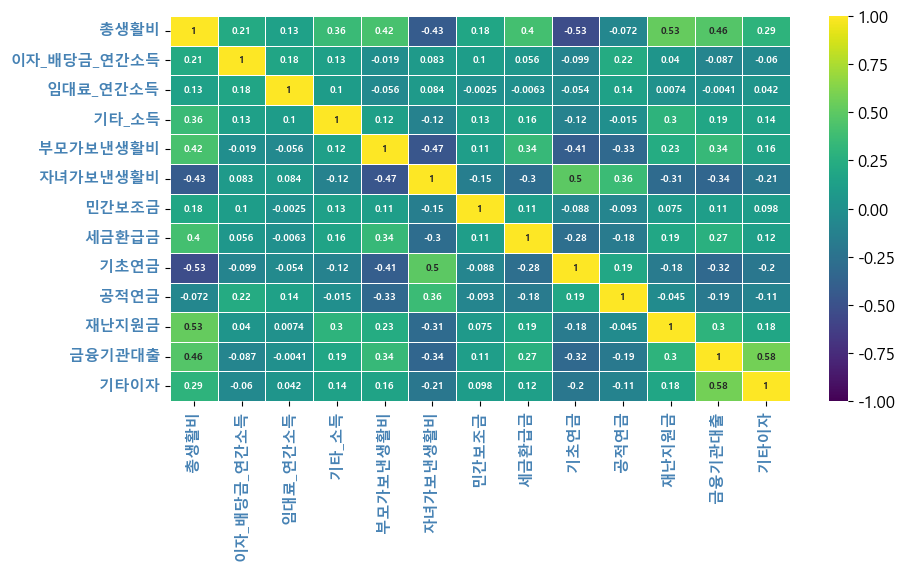

In [28]:
# df2_std_filtered2 = df2_std_filtered.drop(['금융기관대출'],axis = 1)
plt.rcParams["figure.figsize"] = (10,5)

df2_filtered = df2.drop(['주택관련_부채액'],axis = 1)                #주택관련_부채액 컬럼 제거
df2_filtered2 = df2_filtered.drop(['주거관련_부채의_이자'],axis = 1) #주거관련_부채의_이자 컬럼 제거

corr2=sb.heatmap(df2_filtered2.corr(method='spearman'),
           annot = True,
           cmap = 'viridis',
           vmin = -1, vmax=1,
           linewidths=.5,
           annot_kws={"size": 7, 'weight':'bold'}  # 글자 크기 조정
)
corr2.set_xticklabels(corr2.get_xticklabels(), fontsize=11, fontweight='bold', color='steelblue') #히트맵을 변수에 담고 이런식으로 label 수정 가능
corr2.set_yticklabels(corr2.get_yticklabels(), fontsize=11, fontweight='bold', color='steelblue') #히트맵을 변수에 담고 이런식으로 label 수정 가능
plt.show()
plt.close()

In [29]:
helper.spearman_r(df2_filtered2)

+-----------------------------------------+-------------+--------------+----------+
| fields                                  |   statistic |       pvalue | result   |
|-----------------------------------------+-------------+--------------+----------|
| 총생활비 vs 이자_배당금_연간소득        |    0.214765 |  1.13631e-82 | True     |
| 이자_배당금_연간소득 vs 임대료_연간소득 |    0.175856 |  1.29281e-55 | True     |
| 임대료_연간소득 vs 기타_소득            |   0.0997323 |  7.85451e-19 | True     |
| 기타_소득 vs 부모가보낸생활비           |    0.120537 |  7.92972e-27 | True     |
| 부모가보낸생활비 vs 자녀가보낸생활비    |   -0.467324 |            0 | True     |
| 자녀가보낸생활비 vs 민간보조금          |   -0.153996 |  6.55878e-43 | True     |
| 민간보조금 vs 세금환급금                |    0.110892 |  6.23443e-23 | True     |
| 세금환급금 vs 기초연금                  |   -0.278614 | 4.42618e-140 | True     |
| 기초연금 vs 공적연금                    |    0.193484 |  3.71118e-67 | True     |
| 공적연금 vs 재난지원금                  |  -0.0450092 |  6.56581e-05 | True     |
| 재난지원금 vs 금융기관대출        

#### #히트맵 결과(최종)

- 변수 제거 후 상관계수가 개선됨을 확인.
    - 다만 주성분분석(PCA)분석 이후 제거 여부를 결정하기로 확정.<br>
<br>
- 일부 독립변수간에 상관관계가 존재함을 확인.

- 전체적으로 양의 상관관계를 띄고 있으나 소수의 그렇지 않은 관계를 확인.

- 총생활비-기초연금간, 총생활비-자녀가보낸생활비 간에는 비교적 강한 음의 상관관계가 존재함을 확인.
    - 이는 기초연금, 자녀가보낸생활비의 액수가 증가 할수록 총생활비가 낮아진다는 것을 의미.<br>
<br>
- 금융기관대출-주택관련부채액-주거관련부채의이자 간에 상관관계가 있음을 확인할 수 있다.
    - 다만 이 부분은 대출액이 커질수록 이자도 당연히 커지기 때문에 합리적이라고 볼 수 있다.

# #14. 히트맵에서 확인한 상관계수가 높은 2개의 변수 제거 후 시험적으로 다중회귀분석 진행(스케일링 하지 않고 진행)

In [30]:
df2_removed_names =['이자_배당금_연간소득','임대료_연간소득','기타_소득','부모가보낸생활비','자녀가보낸생활비','민간보조금','세금환급금','금융기관대출','기타이자','기초연금','공적연금','재난지원금']
result = helper.myOls(df2, x=df2_removed_names, y="총생활비")
result.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총생활비   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     422.2
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:08:07   Log-Likelihood:                -53197.
No. Observations:                7859   AIC:                         1.064e+05
Df Residuals:                    7846   BIC:                         1.065e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     285.2447      4.694     60.764      0.000     276.043     294.447
이자_배당금_연간소득     0.0996      0.010     10.112      0.000       0.080       0.119
임대료_연간소득        0.0357      0.004      9.276      0.000       0.028       0.043
기타_소득           0.1581      0.091      1.744      0.081      -0.020       0.336
부모가보낸생활비        0.1194      0.011     10.699      0.000       0.098       0.141
자녀가보낸생활비       -0.0169      0.006     -2.758      0.006      -0.029      -0.005
민간보조금           0.1147      0.012      9.703      0.000       0.092       0.138
세금환급금           0.9534      0.041     23.159      0.000       0.873       1.034
금융기관대출          0.0069      0.000     19.370      0.000       0.006       0.008
기타이자            0.0111      0.008      1.474      0.140      -0.004       0.026
기초연금           -0.3339      0.012    -27.753      0.000      -0.357      -0.310
공적연금            0.0057      0.004      1.569      0.117      -0.001       0.013
재난지원금           0.4163      0.021     20.164      0.000       0.376       0.457
==============================================================================
Omnibus:                     5439.291   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171168.607
Skew:                           2.901   Prob(JB):                         0.00
Kurtosis:                      25.115   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
result.table

B   표준오차         β         t   유의확률       VIF
종속변수 독립변수                                                            
총생활비 이자_배당금_연간소득   0.0996  0.010  0.099601   10.112*  0.000  1.087088
     임대료_연간소득      0.0357  0.004  0.035718    9.276*  0.000  1.172288
     기타_소득         0.1581  0.091  0.158138    1.744*  0.081  1.065587
     부모가보낸생활비      0.1194  0.011  0.119435   10.699*  0.000  1.115731
     자녀가보낸생활비     -0.0169  0.006 -0.016895   -2.758*  0.006  1.430458
     민간보조금         0.1147  0.012  0.114734    9.703*  0.000  1.107749
     세금환급금         0.9534  0.041  0.953377   23.159*  0.000  1.218827
     금융기관대출        0.0069  0.000  0.006873   19.370*  0.000  2.773176
     기타이자          0.0111  0.008  0.011111    1.474*  0.140  1.340668
     기초연금         -0.3339  0.012 -0.333856  -27.753*  0.000  1.491903
     공적연금          0.0057  0.004  0.005657    1.569*  0.117  1.170315
     재난지원금         0.4163  0.021  0.416306   20.164*  0.000  1.718557

In [64]:
result.result

'𝑅(0.392), 𝑅^2(0.391), 𝐹(422.2), 유의확률(0.00), Durbin-Watson(1.876)'

> Adj. R-squared(설명력)은 0.391로 약 39%의 설명력을 가진것으로 확인. 즉, 종속 변수인 '총생활비'의 변동 중 약 39.1%가 독립 변수들에 의해 설명될 수 있음을 나타냄

> F-statistic(F-통계량)은 422.2이며 회귀 모델 전체의 유의성을 검정하는데 사용, 높은 수치는 적어도 하나의 독립 변수가 종속 변수에 영향을 미친다는 증거일 수 있음

> Prob(F-statistic)의 경우 0.00으로 전체 모델이 통계적으로 유의미하다는 결론을 내릴 수 있음

> 각 독립변수의 p-value중(유의확률) 0.05이하를 만족하지 않는 변수는 `기타_소득`,`기타이자`,`공적연금` 3가지로 나타남

> Durbin-Watson의 경우 잔차들 간의 자기상관을 나타내며, 값이 2에 가까우면 자기상관이 없다고 판단 가능. 여기서는 1.876으로 만족함

> VIF 확인 결과 각 독립변수별 다중공선성은 없는것으로 확인됨

# #15. (주성분분석)PCA분석

##### 데이터 타입이 category가 아닌 변수만 추출(분산분석은 카테고리가 지원되지 않기 때문)

In [32]:
cnames = []
dtypes = df2.dtypes

for i, v in enumerate(dtypes):
    if v != 'category':
        print(dtypes.index[i], dtypes[i])
        cnames.append(dtypes.index[i])
        
print(cnames)

총생활비 int64
이자_배당금_연간소득 float64
임대료_연간소득 int64
기타_소득 float64
부모가보낸생활비 float64
자녀가보낸생활비 int64
민간보조금 float64
세금환급금 float64
기초연금 int64
공적연금 int64
재난지원금 int64
금융기관대출 int64
주택관련_부채액 float64
주거관련_부채의_이자 int64
기타이자 float64
['총생활비', '이자_배당금_연간소득', '임대료_연간소득', '기타_소득', '부모가보낸생활비', '자녀가보낸생활비', '민간보조금', '세금환급금', '기초연금', '공적연금', '재난지원금', '금융기관대출', '주택관련_부채액', '주거관련_부채의_이자', '기타이자']


# #16. Data Scaling -> 표준화(Standardization scaling)

In [51]:
x_train_std_df, y_train_std_df = helper.scalling(df2[cnames], '총생활비')
x_train_std_df

,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,-0.215825,-0.200522,-0.004582,-0.209725,0.653613,1.488536,-0.242354,-0.880946,-0.427626,-0.580214,0.888392,-0.320955,-0.272759,0.861872
1,-0.215825,-0.200522,-0.004582,-0.209725,0.362327,-0.237737,-0.242354,0.757655,-0.427626,-0.622254,-0.367689,-0.320955,-0.272759,-0.133894
2,-0.215825,-0.076379,-0.004582,-0.209725,-0.560079,1.118621,-0.242354,0.757655,0.372241,-0.622254,1.390825,3.401969,3.415518,-0.133894
3,0.357141,-0.200522,0.071568,-0.209725,-0.560079,-0.188415,-0.242354,1.740816,-0.427626,0.260578,-0.367689,-0.320955,-0.272759,-0.133894
4,-0.011194,-0.200522,-0.004582,-0.209725,0.459423,-0.272263,-0.242354,0.757655,-0.427626,-0.496135,-0.367689,-0.320955,-0.272759,-0.133894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7854,-0.215825,-0.200522,-0.233032,0.018732,-0.560079,-0.287059,0.927333,-0.880946,-0.427626,0.050380,0.009135,0.223863,0.219011,-0.133894
7855,-0.215825,0.823652,-0.233032,-0.026959,-0.560079,-0.287059,1.261529,-0.880946,-0.427626,0.050380,4.656635,-0.320955,-0.272759,4.304376
7856,-0.215825,6.006591,-0.233032,-0.026959,-0.560079,-0.287059,-0.242354,-0.880946,-0.427626,0.218539,2.891465,4.391177,0.070455,-0.133894
7857,-0.052121,-0.200522,-0.271107,-0.209725,-0.560079,-0.287059,-0.242354,-0.880946,-0.427626,-0.538174,1.139608,1.858317,1.571379,-0.133894


> 헬퍼 모듈에는 종속변수도 스케일링하는 것으로 나와있어 다중회귀 분석시에는 스케일링 하지 않은 원본 데이터셋으로 진행 예정

In [34]:
# # 표준화 결과를 활용하여 주성분 분석 수행
model = pca()
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [14] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]


[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,금융기관대출,0.491171,best
1,PC2,자녀가보낸생활비,0.497598,best
2,PC3,공적연금,0.567770,best
3,PC4,기타_소득,0.758736,best
4,PC5,세금환급금,-0.454537,best
5,PC6,민간보조금,-0.635869,best
6,PC7,재난지원금,-0.509041,best
7,PC8,공적연금,-0.540182,best
8,PC9,부모가보낸생활비,0.771742,best
9,PC10,이자_배당금_연간소득,0.454611,best


### #16-1. 중간 결과

앞서 히트맵에서 높은 상관성을 가진 `임대료_연간소득`, `주택관련_부채액`, `주거관련_부채의_이자`가 `weak` 요인으로 확인.

In [35]:
# # 주성분 선정
best = topfeat.query("type=='best'")
best_names = list(set(list(best['feature'])))
best_names

['부모가보낸생활비',
 '기초연금',
 '이자_배당금_연간소득',
 '금융기관대출',
 '민간보조금',
 '재난지원금',
 '기타이자',
 '자녀가보낸생활비',
 '공적연금',
 '기타_소득',
 '세금환급금']

In [58]:
# target_names 변수에 PCA분석을 통한 best값+종속변수를 결합
target_names = best_names + ['총생활비']
target_names1 = target_names+['임대료_연간소득']
target_names1

['부모가보낸생활비',
 '기초연금',
 '이자_배당금_연간소득',
 '금융기관대출',
 '민간보조금',
 '재난지원금',
 '기타이자',
 '자녀가보낸생활비',
 '공적연금',
 '기타_소득',
 '세금환급금',
 '총생활비',
 '임대료_연간소득']

In [37]:
# 총생활비 원본 데이터셋만 따로 추출 후 데이터프레임화
df_test=DataFrame(df2['총생활비'])
df_test

,총생활비
0,275
1,239
2,156
3,541
4,85
...,...
7860,384
7861,715
7862,595
7863,562


In [59]:
merge_df = merge(x_train_std_df, df_test, left_index=True, right_index=True)
df3 = merge_df.filter(target_names1)
df3.head()

,부모가보낸생활비,기초연금,이자_배당금_연간소득,금융기관대출,민간보조금,재난지원금,기타이자,자녀가보낸생활비,공적연금,기타_소득,세금환급금,총생활비,임대료_연간소득
0,-0.209725,-0.880946,-0.215825,0.888392,1.488536,-0.580214,0.861872,0.653613,-0.427626,-0.004582,-0.242354,275,-0.200522
1,-0.209725,0.757655,-0.215825,-0.367689,-0.237737,-0.622254,-0.133894,0.362327,-0.427626,-0.004582,-0.242354,239,-0.200522
2,-0.209725,0.757655,-0.215825,1.390825,1.118621,-0.622254,-0.133894,-0.560079,0.372241,-0.004582,-0.242354,156,-0.076379
3,-0.209725,1.740816,0.357141,-0.367689,-0.188415,0.260578,-0.133894,-0.560079,-0.427626,0.071568,-0.242354,541,-0.200522
4,-0.209725,0.757655,-0.011194,-0.367689,-0.272263,-0.496135,-0.133894,0.459423,-0.427626,-0.004582,-0.242354,85,-0.200522


In [60]:
test21=['부모가보낸생활비','임대료_연간소득','기초연금','이자_배당금_연간소득','금융기관대출','민간보조금','재난지원금','기타이자','자녀가보낸생활비','공적연금','기타_소득','세금환급금']

# #17. scaling한 독립변수+원본 종속변수로 다중회귀분석 진행

In [61]:
result1 = helper.myOls(df3, x=test21, y="총생활비")
result1.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총생활비   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     13.53
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           3.53e-28
Time:                        11:23:37   Log-Likelihood:                -55028.
No. Observations:                7853   AIC:                         1.101e+05
Df Residuals:                    7840   BIC:                         1.102e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     314.8648      3.019    104.305      0.000     308.947     320.782
부모가보낸생활비       10.6635      3.101      3.439      0.001       4.585      16.742
임대료_연간소득        4.2797      3.150      1.359      0.174      -1.894      10.454
기초연금          -16.3163      3.356     -4.862      0.000     -22.895      -9.738
이자_배당금_연간소득     6.8081      3.055      2.229      0.026       0.820      12.796
금융기관대출         13.4576      3.587      3.751      0.000       6.426      20.490
민간보조금          10.6736      3.054      3.495      0.000       4.687      16.661
재난지원금           2.6277      3.117      0.843      0.399      -3.482       8.737
기타이자           -1.4832      3.362     -0.441      0.659      -8.073       5.107
자녀가보낸생활비       -0.1067      3.204     -0.033      0.973      -6.387       6.174
공적연금            0.6162      3.093      0.199      0.842      -5.447       6.679
기타_소득           3.7615      3.023      1.245      0.213      -2.163       9.687
세금환급금          12.8111      3.127      4.097      0.000       6.682      18.940
==============================================================================
Omnibus:                     4363.013   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55464.644
Skew:                           2.404   Prob(JB):                         0.00
Kurtosis:                      15.099   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
result1.table

B   표준오차          β        t   유의확률       VIF
종속변수 독립변수                                                             
총생활비 부모가보낸생활비      10.6635  3.101  10.663478   3.439*  0.001  1.056501
     임대료_연간소득       4.2797  3.150   4.279737   1.359*  0.174  1.089350
     기초연금         -16.3163  3.356 -16.316349  -4.862*  0.000  1.237515
     이자_배당금_연간소득    6.8081  3.055   6.808091   2.229*  0.026  1.024907
     금융기관대출        13.4576  3.587  13.457577   3.751*  0.000  1.412932
     민간보조금         10.6736  3.054  10.673596   3.495*  0.000  1.017570
     재난지원금          2.6277  3.117   2.627669   0.843*  0.399  1.066550
     기타이자          -1.4832  3.362  -1.483209  -0.441*  0.659  1.241104
     자녀가보낸생활비      -0.1067  3.204  -0.106683  -0.033*  0.973  1.126137
     공적연금           0.6162  3.093   0.616216   0.199*  0.842  1.048384
     기타_소득          3.7615  3.023   3.761545   1.245*  0.213  1.003383
     세금환급금         12.8111  3.127  12.811092   4.097*  0.000  1.074596

> #### 결과

> 설명력 0.019로 나옴. 이는 여러가지 이유가 있을 수 있으나 몇 가지를 꼽아보자면 다음과 같다

> 독립 변수 간에 강한 상관관계가 있는 경우 다중공선성이 발생할 수 있고 이로 인해 모델의 설명력이 감소할 수 있다. 하지만 다중공선성이 강한 변수는 이미 heatmap, pca분석에서 확인 및 제외되었음

> 데이터셋에 이상치가 존재하거나 극단값이 있는 경우 모델의 설명력이 저하될 수 있음. boxplot 확인 시 이상치가 상당 수 발견되었으나 당 데이터는 조작된 데이터가 아닌 시민이 직접 설문조사로 나온 실데이터이기 때문에 추가로 이상치 제거는 힘들다고 판단

> 데이터의 양이 충분하지 않으면 모델이 데이터의 복잡성을 충분히 학습하지 못할 수 있음. 나름 현실성 있는 이유로 생각되며 데이터셋이 10,000개가 안되기 때문에 그럴 수 있다고 생각됨. 그러나 추가적인 데이터 확보는 불가함

> 수치값의 차이가 그렇게 크기 않아 scaling을 안하고 진행하는게 타당할 수 있음

> #### 결론

> 해당 분석은 scaling을 진행하지 않고 원본 데이터 셋으로 진행하는 것이 더 타당하다고 결론

# #18. 다중선형회귀분석(Multiple Linear Regression) 실행

- case1: pca분석에서 weak로 나온 3개의 독립변수를 제외하지 않고 모든 변수를 넣은채로 분석 시행

- case2: weak 중 하나인 임대료_연간소득만 제외하고 시행

- case3: weak 중 하나인 주택관련_부채액만 제외하고 시행

- case4: weak 중 하나인 주거관련_부채의_이자만 제외하고 시행

- case5: weak 중 임대료_연간소득 및 주택관련_부채액 2가지 weak변수 제외하고 시행

- case6: weak 중 임대료_연간소득 및 주거관련_부채의_이자 2가지 weak변수 제외하고 시행

- case7: weak 중 주택관련_부채액 및 주거관련_부채의_이자 2가지 weak변수 제외하고 시행

- case8: weak 변수 3가지 전부 제외하고 시행


```
get_df함수를 응용하여 경우의 수를 전부 계산하여 비교,분석을 진행해본다.

(E. 확증적 데이터 분석(CDA)/04. 선형회귀분석/10-선형회귀_예시(2).ipynb 참고)
```

In [65]:
def get_df(case_number, is_scale=False):
    
    # weak를 빼지 않고 사용하는 경우
    if case_number == 1:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득','기초연금','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득','주택관련_부채액','주거관련_부채의_이자']
    
    # 임대료_연간소득를 제거한 경우
    elif case_number == 2:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','주택관련_부채액','주거관련_부채의_이자']
    
    # 주택관련_부채액을 제거한 경우
    elif case_number == 3:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득','주거관련_부채의_이자']
    
    # 주거관련_부채의_이자를 제거한 경우
    elif case_number == 4:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득','주택관련_부채액']
    
    # 임대료_연간소득 및 주택관련_부채액 2가지 weak변수 제거했을 경우
    if case_number == 5:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','주거관련_부채의_이자']

    # 임대료_연간소득 및 주거관련_부채의_이자 2가지 weak변수 제거했을 경우
    if case_number == 6:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','주택관련_부채액']

    # 주택관련_부채액 및 주거관련_부채의_이자 2가지 weak변수 제거했을 경우
    if case_number == 7:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득']
    
    # weak 3가지 전부 뺐을 경우
    if case_number == 8:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비']

    # 표준화를 적용하지 않은 경우
    if not is_scale:
        tmp = df2.filter(fnames1)
    # 표준화를 적용한 경우
    else:
        # 미리 적용해 둔 표준화 결과를 병합, 필터 함수 이용
        left = x_train_std_df.filter(fnames1)
        # 원본 데이터만 필요할 경우 
        right = df_test
        # 결합
        tmp = merge(left, right, left_index=True, right_index=True)
        None
        
    tmp2 = get_dummies(tmp, drop_first=True, dtype='int')
    return tmp2

In [76]:
# target_df = get_df(`확인할 case 번호`, True)

target_df = get_df(4, False)
# helper.prettyPrint(target_df.head())

# 독립변수 이름만 추출
xnames = list(target_df.columns)
xnames.remove('총생활비')
xnames

ols_result = helper.myOls(target_df, y='총생활비', x=xnames)

print(ols_result.summary)

helper.prettyPrint(ols_result.table)

print(ols_result.goodness, end="\n\n")

# print(ols_result.result, end='\n\n')

for i in ols_result.varstr:
    print(i)

                            OLS Regression Results                            
Dep. Variable:                   총생활비   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     515.2
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:15:40   Log-Likelihood:                -53172.
No. Observations:                7859   AIC:                         1.064e+05
Df Residuals:                    7848   BIC:                         1.064e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     285.7375      4.422     64.618      

### #18-1. MLR 모든 CASE 결과

`case_number == 1`
- 𝑅(0.396), 𝑅^2(0.395), 𝐹(468.4), 유의확률(0.00), Durbin-Watson(1.878)

`case_number == 2`
- 𝑅(0.388), 𝑅^2(0.387), 𝐹(496.8), 유의확률(0.00), Durbin-Watson(1.870)

`case_number == 3`
- 𝑅(0.393), 𝑅^2(0.393), 𝐹(508.9), 유의확률(0.00), Durbin-Watson(1.875)

`case_number == 4`
- 𝑅(0.396), 𝑅^2(0.396), 𝐹(515.2), 유의확률(0.00), Durbin-Watson(1.878)

`case_number == 5`
- 𝑅(0.386), 𝑅^2(0.385), 𝐹(547.7), 유의확률(0.00), Durbin-Watson(1.867)

`case_number == 6`
- 𝑅(0.388), 𝑅^2(0.387), 𝐹(552.1), 유의확률(0.00), Durbin-Watson(1.870)

`case_number == 7`
- 𝑅(0.392), 𝑅^2(0.391), 𝐹(561.8), 유의확률(0.00), Durbin-Watson(1.875)

`case_number == 8`
- 𝑅(0.385), 𝑅^2(0.384), 𝐹(613.6), 유의확률(0.00), Durbin-Watson(1.868)


> 결론

> case_number 1,4가 설명력이 가장 높게 나왔음

> case1의 경우 pca분석에서 나온 weak 변수 3가지를 제외하지 않고 분석을 한 결과

> case4의 경우 pca분석에서 나온 weak 변수 중 "주거관련_부채의_이자"를 제외하고 분석을 한 결과

> case1을 분석한 경우 실제로 "주거관련_부채의_이자"는 유의하지 않은 예측변인이라고 확인되었음

> 또한 F-statistic(전체 회귀 모델의 통계적 유의성)값 또한 case1에 비해 더 높기 때문에 case 4을 최종 채택하기로 함

  >> 참고로 pca 분석은 참고용이지 weak변수를 무조건 제외해야 하는 것은 아님. 또한 해당 분석에서 필요한 요인이라고 가정했기 때문에 제외하지 않은 case를 채택


# #19. MLR 결과 시각화

> 총생활비에 대해 가장 영향력이 높은 4가지 변수 선정하여 실제값과 예측값 비교(세금환급금, 재난지원금,기초연금, 민간보조금)

In [43]:
# ols_result.fit.fittedvalues

# fit.fittedvalues는 주어진 독립 변수들을 기반으로 다중 회귀 모델이 예측한 종속 변수의 예측값을 나타낸다
# 이 값은 다중 회귀분석 모델이 주어진 독립 변수들을 통해 예측한 종속 변수의 추정치다.
# 그리고 이 값은 모델의 설명력(R-squared)과 직접적인 연관이 없다.

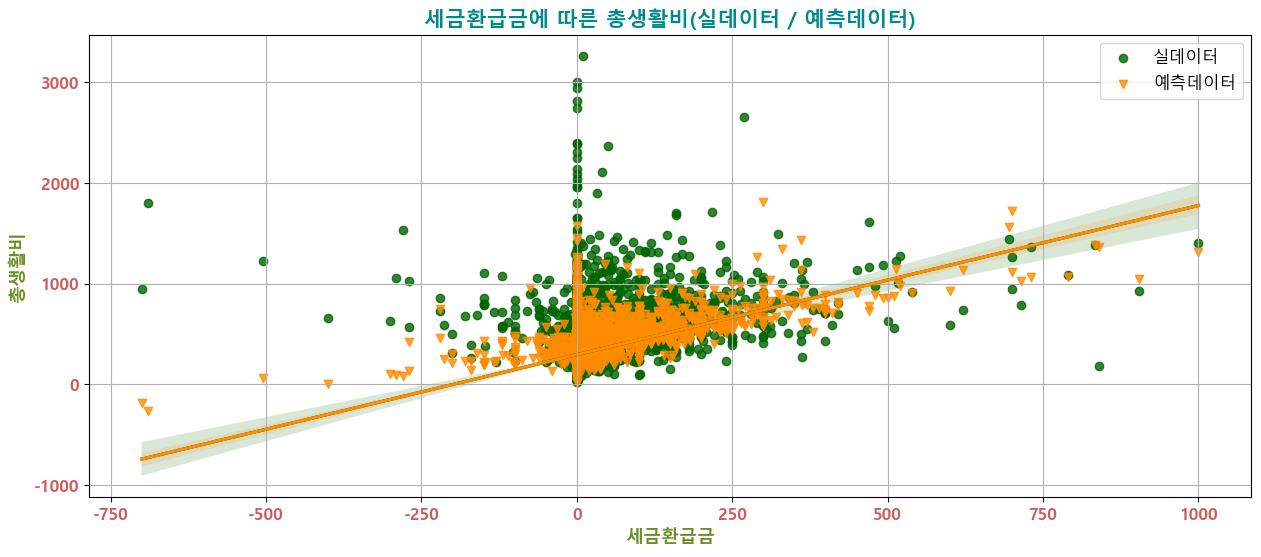

In [77]:
# # `세금환급금`에 따른 `총생활비` 비교

plt.figure(figsize=(15, 6))
sb.regplot(data=target_df, x='세금환급금', y='총생활비',color='darkgreen',label='실데이터')
sb.regplot(data=target_df, x='세금환급금', y=ols_result.fit.fittedvalues,color='darkorange',marker='v',label='예측데이터')
plt.title("세금환급금에 따른 총생활비(실데이터 / 예측데이터)",color='darkcyan',fontsize=15,fontweight='bold')
plt.legend(loc='upper right') #범례
plt.xlabel('세금환급금',color='olivedrab',fontsize=13,fontweight='bold')
plt.ylabel('총생활비',color='olivedrab',fontsize=13,fontweight='bold')
plt.xticks(color='indianred',fontweight='bold')
plt.yticks(color='indianred',fontweight='bold')
plt.grid()
plt.plot()
plt.show()

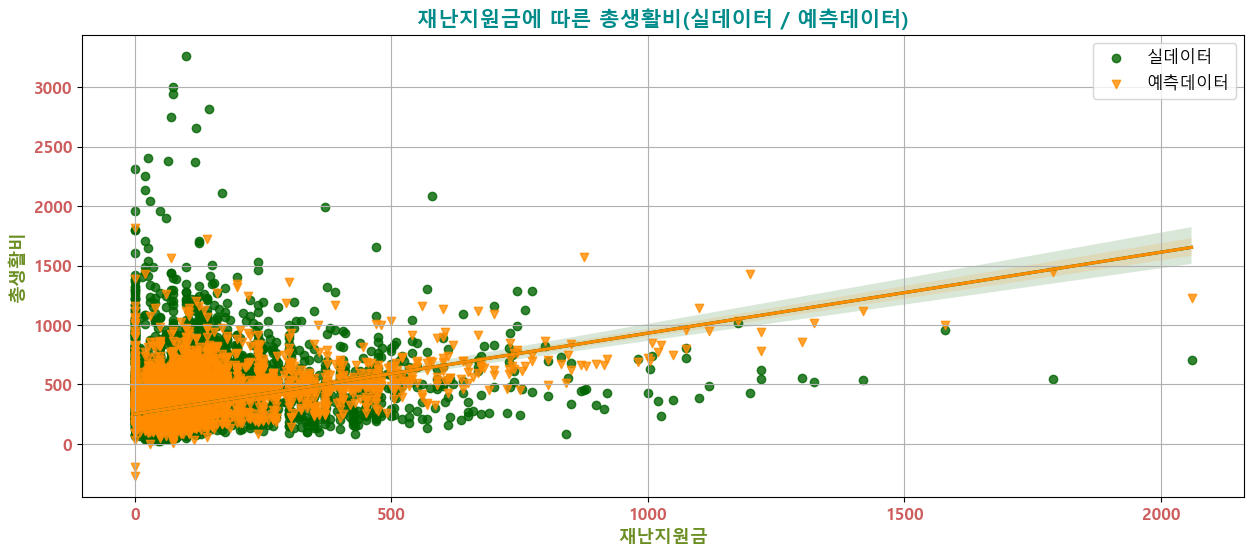

In [78]:
# # `재난지원금`에 따른 `총생활비`비교

plt.figure(figsize=(15, 6))
sb.regplot(data=target_df, x='재난지원금', y='총생활비',color='darkgreen',label='실데이터')
sb.regplot(data=target_df, x='재난지원금', y=ols_result.fit.fittedvalues,color='darkorange',marker='v',label='예측데이터')
plt.title("재난지원금에 따른 총생활비(실데이터 / 예측데이터)",color='darkcyan',fontsize=15,fontweight='bold')
plt.legend(loc='upper right') #범례
plt.xlabel('재난지원금',color='olivedrab',fontsize=13,fontweight='bold')
plt.ylabel('총생활비',color='olivedrab',fontsize=13,fontweight='bold')
plt.xticks(color='indianred',fontweight='bold')
plt.yticks(color='indianred',fontweight='bold')
plt.grid()
plt.plot()
plt.show()

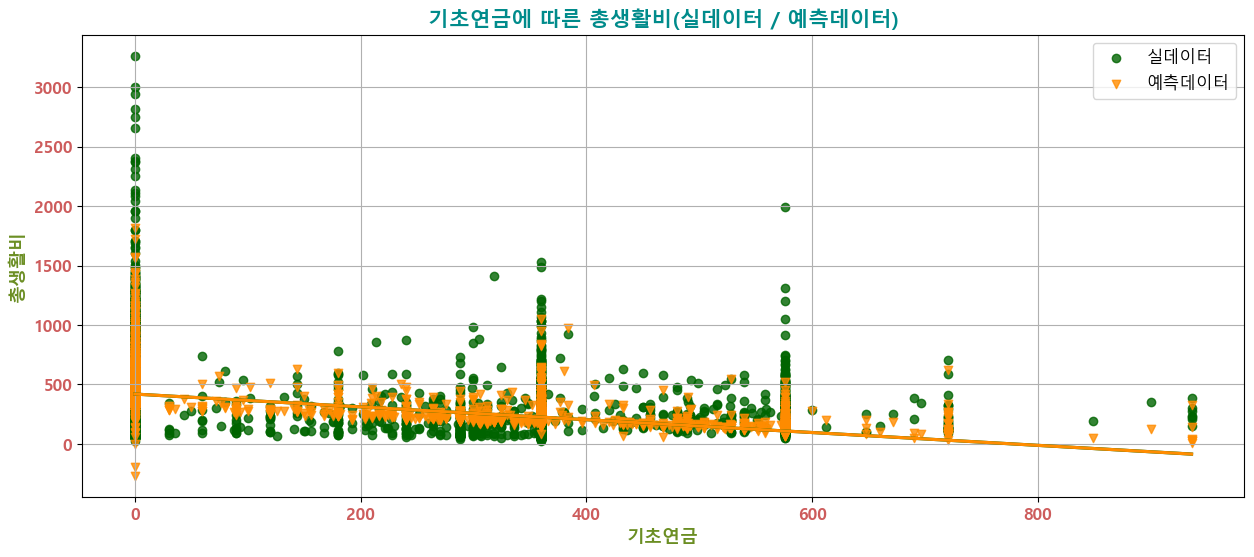

In [79]:
# `기초연금`에 따른 `총생활비`출 비교

plt.figure(figsize=(15, 6))
sb.regplot(data=target_df, x='기초연금', y='총생활비',color='darkgreen',label='실데이터')
sb.regplot(data=target_df, x='기초연금', y=ols_result.fit.fittedvalues,color='darkorange',marker='v',label='예측데이터')
plt.title("기초연금에 따른 총생활비(실데이터 / 예측데이터)",color='darkcyan',fontsize=15,fontweight='bold')
plt.legend(loc='upper right') #범례
plt.xlabel('기초연금',color='olivedrab',fontsize=13,fontweight='bold')
plt.ylabel('총생활비',color='olivedrab',fontsize=13,fontweight='bold')
plt.xticks(color='indianred',fontweight='bold')
plt.yticks(color='indianred',fontweight='bold')
plt.grid()
plt.plot()
plt.show()

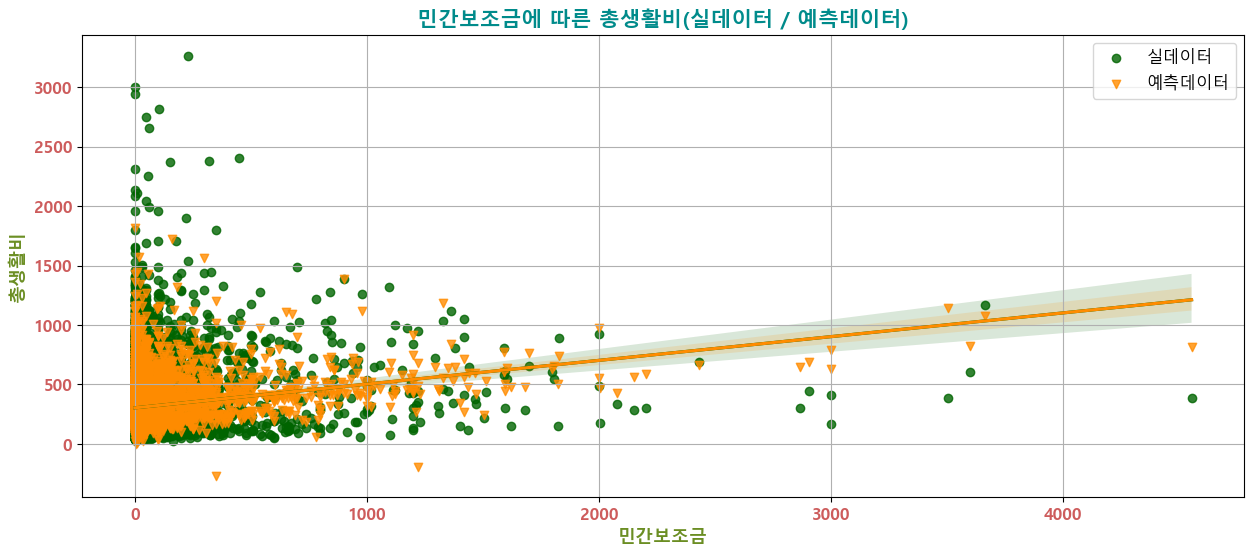

In [80]:
# # `민간보조금`에 따른 `총생활비` 비교

plt.figure(figsize=(15, 6))
sb.regplot(data=target_df, x='민간보조금', y='총생활비',color='darkgreen',label='실데이터')
sb.regplot(data=target_df, x='민간보조금', y=ols_result.fit.fittedvalues,color='darkorange',marker='v',label='예측데이터')
plt.title("민간보조금에 따른 총생활비(실데이터 / 예측데이터)",color='darkcyan',fontsize=15,fontweight='bold')
plt.legend(loc='upper right') #범례
plt.xlabel('민간보조금',color='olivedrab',fontsize=13,fontweight='bold')
plt.ylabel('총생활비',color='olivedrab',fontsize=13,fontweight='bold')
plt.xticks(color='indianred',fontweight='bold')
plt.yticks(color='indianred',fontweight='bold')
plt.grid()
plt.plot()
plt.show()

### #19-1. MLR 시각화 및 결과 보고

다중선형회귀분석 확인 결과 Durbin-Watson의 경우 1.878로 2에 근접하여 다중회귀분석모형에 적합하다고 판단.

VIF값은 10미만으로 각 요인별 다중공선성은 없는것으로 확인되었다.

Adj. R-squared 값은 0.395로 약 40%의 설명력을 나타냈다.

𝐹(468.4), 유의확률(0.00)로 통계적으로 유의미하며 모집단에서도 의미있다고 볼 수 있다.

### #19-2. 총생활비에 가장 큰 영향을 미치는 4가지 요소

1. 세금환급금
- 회귀계수는 양수 0.9171(p<0.05)로 총생활비와 세금환급금 간에는 양의 상관관계가 존재해 `환급액이 많을 수록` 총생활비도 증가한다는 것을 의미한다. 
- 세금환급액이 많다는 건 일반적으로 소비가 많아 그만큼 세액공제 혜택을 많이 받는다는 것을 뜻하기 때문에 합리적인 결과라고 추측된다.

2. 재난지원금
- 회귀계수는 양수 0.4083(p<0.05)로 총생활비와 재난지원금 간에는 양의 상관관계가 존재해 `재난지원금액이 많을 수록 총생활비도 증가`한다는 것을 의미한다.
- 일반적으로 생각했을 때 재난지원금은 코로나19로 인해 정부에서 국민의 생계 안정과 소비촉진 등을 위하여 지원하는 금액(복지제도)이며 소득의 증가와 함께 부가적으로 발생한 혜택을 적극적으로 활용한 만큼 소비량의 상승을 예상할 수 있다.

3. 기초연금
- 회귀계수는 -0.3296(p<0.05)로 음수이다. 이는 곧 총생활비와 기초연금 간에는 음의 상관관계가 있고 `기초연금 금액이 증가할 수록 총생활비가 감소한다`는 것을 의미한다.
- 기초연금은 65세 이상 노인들이 받는 연금으로서 이 말을 데이터 수치만 보고 해석해보자면 노인일수록 생활하는데 지불하는 비용이 적어진다는 것을 추론 할 수 있다.(즉 돈을 많이 쓰지 않는다는 말과 같다.)

4. 민간보조금
- 회귀계수는 양수 0.1143(p<0.05)로 총생활비와 민간보조금 간에는 양의 상관관계가 존재해 보조금이 많을 수록 총생활비도 증가한다는 것을 의미한다.
- 이는 재난지원금과 마찬가지의 맥락으로 볼 수 있으며 소득이 증가한만큼 생활비 소비폭 또한 증가했다고 볼 수 있다. 


# #20. 잔차의 선형성 검사

결과값을 토대로 잔차가 선형성을 따르는지 확인해본다.

> 잔차란?
 >> 잔차(Residual)는 다중선형회귀 분석에서 모델로 예측한 값과 실제 관측값 사이의 차이를 나타냄. 간단하게 말하면, 잔차는 모델이 설명하지 못하는 부분 또는 오차를 나타내며, 이 값이 작을수록 모델이 데이터를 잘 설명하고 있다고 볼 수 있음.

In [48]:
sdf = DataFrame({
    "관측값": target_df['총생활비'],                     # 실제 데이터의 총생활비 열을 가져옴
    "예측값": ols_result.fit.fittedvalues,              # 회귀 모델로 예측한 총생활비 값
    "잔차": ols_result.fit.resid,                       # 실제 총생활비에서 예측값을 뺀 잔차 값
    "zscore": stats.zscore(ols_result.fit.fittedvalues) # 예측값에 대한 Z-score 계산
})

sdf

,관측값,예측값,잔차,zscore
0,275,378.811360,-103.811360,0.374410
1,239,170.303493,68.696507,-0.851386
2,156,376.090137,-220.090137,0.358413
3,541,163.492129,377.507871,-0.891429
4,85,180.088808,-95.088808,-0.793859
...,...,...,...,...
7860,384,425.166968,-41.166968,0.646930
7861,715,639.625021,75.374979,1.907707
7862,595,745.859855,-150.859855,2.532251
7863,562,417.032243,144.967757,0.599107


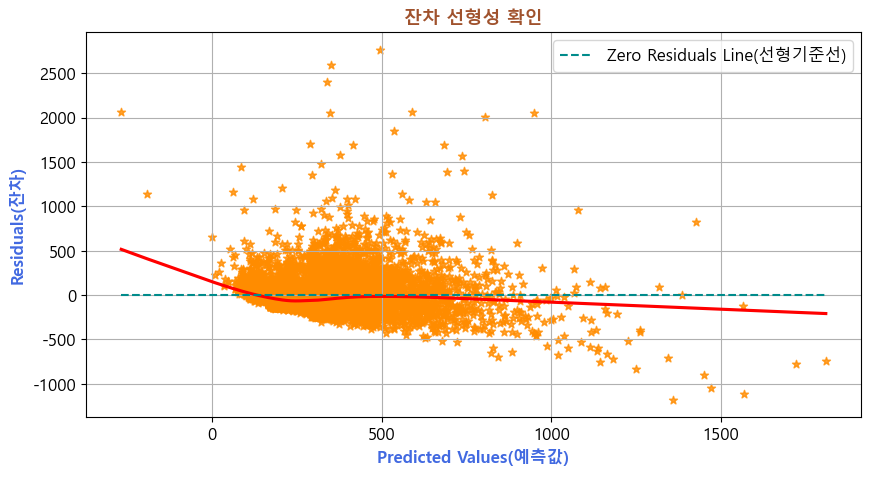

In [49]:
# 잔차의 선형성
xmin = sdf['예측값'].min()
xmax = sdf['예측값'].max()
xrange = [xmin, xmax]
yrange = [0,0]

plt.figure()
sb.regplot(data = sdf, x = '예측값', y = '잔차', lowess = True, line_kws={'color':'red'},marker='*',color='darkorange')
sb.lineplot(x = xrange, y = yrange, color = 'darkcyan', linestyle = '--', label='Zero Residuals Line(선형기준선)')
plt.title('잔차 선형성 확인',color='sienna',fontsize=13,fontweight='bold')
plt.xlabel('Predicted Values(예측값)',color='royalblue',fontweight='bold')
plt.ylabel('Residuals(잔차)',color='royalblue',fontweight='bold')
plt.legend()
plt.grid()
plt.show()
plt.close()

> 결과

> 분석에 사용된 모델의 선형성을 비교적 만족한다고 판단된다.

> 즉, 종속변수와 독립변수는 선형 관계에 있고 잔차들의 분포가 정규 분포를 이루어서 분석에 용이한 모델이라 판단한다.

> 이를 근거로 분석을 통한 결론도 어느정도 유효할 것이라고 판단한다.

# #21. QQ-plot 확인(정규성 확인)

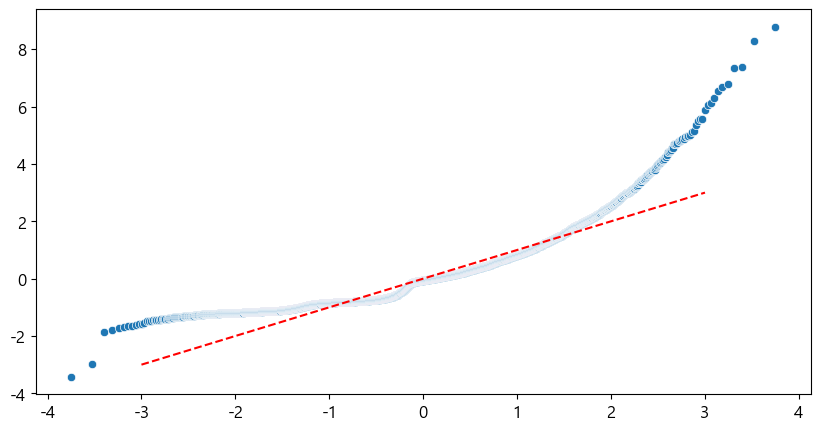

In [50]:
# q-q plot 그래프 시각화
(x, y), _ = stats.probplot(sdf['zscore'])

plt.figure(figsize=(10, 5))
sb.scatterplot(x=x, y=y)
sb.lineplot(x=[-3, 3], y=[-3, 3], color='red', linestyle='--')
plt.show()
plt.close()

> 잔차 정규성 시각화 결과

- 처음 부분과 끝 부분이 정규분포를 따르지 않는것으로 확인.
- 데이터가 정규분포보다 위쪽에 위치해있기 때문에 오른쪽으로 치우져져 있음을 알 수 있다.
- 이는 변수들 중에서 평균보다 큰 값이 많아서(이상치가 많아서) 분포의 오른쪽 끝이 길게 뻩어져 있음을 알 수 있다.
- 상기 내용은 기초통계량에서 예측한 것과 같다.
- 또한 이상치가 분석 결과에 영향을 미칠 수 있음을 고려할 필요가 있다고 볼 수 있다.

# #21. 최종 분석 결과

1.가정한 가설 中 가설1(금융기관 대출 부채가 증가할수록 총 생활비는 감소)은 따르지 않는 것(성립하지 않음)으로 확인되었음. 부채가 증가하면 가구 생활수준이 낮아져 생활비도 감소할 것으로 예상했지만, 금융기관 대출은 원금 및 이자 상환 능력을 반영하기 때문에, 높은 대출액은 곧 높은 수입 및 자본력을 의미할 수도 있다고 보여짐.

2.따라서 금융 기관과의 대출 협상 시 상환 능력과 이자율을 신중히 고려해 대출 부채를 효율적으로
활용하여 투자 또는 자산 확장에 사용한다면 총 생활비 증가에 긍정적으로 작용할 것으로 판단됨.

3.가설2(재난지원금을 수령할 경우 총생활비에 변화(증가))는 따르는 것(성립함)으로 확인되었음.
재난 지원금 등의 소득 보조 프로그램이 실제로 사람들의 생활비에 긍정적인 영향을 미친다면 이것은 
사회적 안전망 프로그램의 중요성에 대한 인식을 증가시키고 관련된 행동 변화를 촉진하는데 
기여할 수 있다고 보여짐.

4.다만 재난 지원금과 같은 지원이 국가 재정에 부담을 줄 수 있으므로, 규모와 빈도를 적절히 조절하고, 목적과 대상을 명확히 하며, 효과적인 모니터링 및 평가를 통해 지원의 효율성을 높여야 함. 이렇게 하면 국가 재정 건전성 유지와 시민들의 생계 안정이 가능하다고 추정 가능.

5.마지막으로 실제 생활비는 다양한 요인의 상호작용에 의해 결정되므로, 단순 금융 요소 이외에도 복합적인 요소를 고려하는 것이 중요함. 기본적으로 효율적인 소비와 저축 습관을 정착시키는 것이 중요하며,  이를 통해 개인과 단체의 경제 안정성을 높이고 긍정적인 경제 효과를 유도할 수 있음. 따라서 데이터 분석 결과를 넘어 개선과 계획을 통해 총 생활비에 긍정적 영향을 줄 수 있도록 도와야 할것임.
